In [191]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
import seaborn as sns
from prettytable import PrettyTable
from scipy.stats import multivariate_normal
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from joblib import dump
from joblib import load
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier
from sklearn.metrics import log_loss, roc_auc_score
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
import seaborn as sns
from prettytable import PrettyTable
from scipy.stats import multivariate_normal
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from joblib import dump
from joblib import load
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier
from sklearn.metrics import log_loss, roc_auc_score
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec  # Import gridspec module
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.models import Model
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Network Traffic Data

In [192]:
df2 = pd.read_csv("/kaggle/input/result-chapter4-plots/network_output.csv", encoding='ISO-8859-1')
df2.head()

,No.,Time,Source,Destination,Protocol,Length,Time since previous frame in this TCP stream,Source Port,Destination Port,Sequence Number,...,Length.1,Byte Address,Info,label,RF_Predictions,SVM_Predictions,GB_Predictions,LR_Predictions,XGboost_Predictions,NN_Binary_Predictions
0,1,0.000000,192.168.1.241,192.168.1.1,COTP,61,0.000000,63749.0,102.0,1.0,...,0.0,0.0,"DT TPDU (0) [COTP fragment, 0 bytes]",Normal,0,0,0,0,0,0
1,2,0.132074,192.168.0.2,192.168.0.1,COTP,145,0.000000,60414.0,102.0,1.0,...,0.0,0.0,DT TPDU (0) EOT,Normal,0,0,0,0,0,0
2,3,0.132577,192.168.0.2,192.168.0.1,COTP,61,0.000503,60414.0,102.0,92.0,...,0.0,0.0,"DT TPDU (0) [COTP fragment, 0 bytes]",Normal,0,0,0,0,0,0
3,4,0.132814,192.168.0.2,192.168.0.1,COTP,61,0.000237,60414.0,102.0,99.0,...,0.0,0.0,"DT TPDU (0) [COTP fragment, 0 bytes]",Normal,0,0,0,0,0,0
4,5,0.200259,192.168.0.2,224.0.0.22,IGMPv3,54,0.000000,0.0,0.0,0.0,...,0.0,0.0,Membership Report / Leave group 224.0.0.252,Normal,0,1,0,1,0,1


# PLC Data

In [193]:
df1 = pd.read_csv("/kaggle/input/result-chapter4-plots/plc_output.csv", encoding='ISO-8859-1')
df1.head()

,PLC Current cycle time,PLC The shortest cycle time,PLC The longest cycle time,PLC Min runtime,PLC Max runtime,PLC Running Status,Current_time,Pump Speed,SG lEVEL,Year,...,CycleTimeDifference,MaxRuntimeRatio,longestimetimeRatio,cycle_maxrun,RF_Predictions,SVM_Predictions,GB_Predictions,LR_Predictions,XGboost_Predictions,NN_Binary_Predictions
0,1083967,1001561,0,0,2063000,0,30:20.6,100.0,14.401727,2024,...,0.0,1.903194,0.0,0.000000,1,1,0,1,0,1
1,1010590,1001561,0,0,2063000,0,30:20.6,100.0,14.401727,2024,...,73377.0,2.041382,0.0,35944.770931,1,0,1,0,0,0
2,1140260,1001561,0,0,2063000,0,30:20.6,100.0,14.401727,2024,...,129670.0,1.809236,0.0,71671.116917,1,0,1,0,0,0
3,1010764,1001561,0,0,2063000,0,30:20.6,100.0,14.401727,2024,...,129496.0,2.041030,0.0,63446.386303,1,0,1,0,0,0
4,1012729,1001561,0,0,2063000,0,30:20.6,100.0,14.401727,2024,...,1965.0,2.037070,0.0,964.620691,0,1,1,1,0,0


# Process Data

In [194]:
df3 = pd.read_csv("/kaggle/input/result-chapter4-plots/process_output.csv", encoding='ISO-8859-1')
df3.head()

,time,CD_Level,CD_Press,CD_CondTemp,RXP(%),RCPFlowoutLP1(kg/s),RCPFlowoutLP2(kg/s),RXCTin (K),RXCTout (K),PZp (Pa),...,Hour,Minute,Second,Millisecond,Time,Actual,Predicted,Error,Normalized error,Classification
0,0.9,0.999925,5268.041237,306.683329,100.099366,8832.727940,8832.724478,562.685367,590.479679,1.511469e+07,...,1,28,21,59,0.9,0.0,6.816424,6.816424,0.069927,1
1,1.0,0.999853,5261.338004,306.661284,100.127070,8832.725954,8832.722302,562.642779,590.446570,1.511453e+07,...,1,28,21,160,1.0,0.0,-1.330204,1.330204,0.013646,0
2,1.1,0.999755,5252.411721,306.631928,100.156630,8833.273552,8833.269792,562.593411,590.415016,1.511427e+07,...,1,28,21,262,1.1,0.0,-1.643353,1.643353,0.016859,0
3,1.2,0.999629,5241.302711,306.595394,100.188727,8833.711972,8833.708136,562.537306,590.383177,1.511402e+07,...,1,28,21,362,1.2,0.0,-1.871750,1.871750,0.019202,0
4,1.3,0.999471,5228.075554,306.551894,100.223989,8833.893826,8833.889990,562.472637,590.349755,1.511379e+07,...,1,28,21,463,1.3,0.0,-2.028920,2.028919,0.020814,0


# Preprocessing Data

In [195]:
import pandas as pd
import re

# Create DataFrame (assuming df2 is already created with 'Arrival Time' column)
df2 = pd.DataFrame(df2)

# Define a function to split the strings
def split_arrival_time(row):
    split_data = re.split(r',|\s|:|\.\s', row['Arrival Time'])
    return split_data


result = df2.apply(split_arrival_time, axis=1, result_type='expand')
result  # Check the shape to see the number of columns


,0,1,2,3,4,5,6,7,8,9
0,Jan,23,,2024,01,30,13.030495000,China,Standard,Time
1,Jan,23,,2024,01,30,13.162569000,China,Standard,Time
2,Jan,23,,2024,01,30,13.163072000,China,Standard,Time
3,Jan,23,,2024,01,30,13.163309000,China,Standard,Time
4,Jan,23,,2024,01,30,13.230754000,China,Standard,Time
...,...,...,...,...,...,...,...,...,...,...
3971,Jan,23,,2024,01,33,10.429856000,China,Standard,Time
3972,Jan,23,,2024,01,33,10.429975000,China,Standard,Time
3973,Jan,23,,2024,01,33,10.430046000,China,Standard,Time
3974,Jan,23,,2024,01,33,10.561245000,China,Standard,Time


In [196]:
# Apply the function to create new columns
df2[['Month','Day', 'Space', 'Year', 'Hour', 'Minute', 'Second', 'Country', 'Standard', 'Time']] = df2.apply(split_arrival_time, axis=1, result_type='expand')

# Splitting the 'Time' column into 'Second' and 'Millisecond' columns
df2[['second', 'Millisecond']] = df2['Second'].str.split('.', expand=True)


# Padding the Millisecond column to ensure it has 6 digits
df2['Millisecond'] = df2['Millisecond'].str.pad(6, side='right', fillchar='0')

# Convert 'Millisecond' column to strings
df2['Millisecond'] = df2['Millisecond'].astype(str)

# Extract the first four digits into a new column 'Milliseconds'
df2['Milliseconds'] = df2['Millisecond'].str[:4]
columns_to_drop = ['Space', 'Standard']
df2.drop(columns=columns_to_drop, inplace=True)


In [197]:
# Assuming 'second' & minute is the column you want to convert
df1['Second'] = pd.to_numeric(df1['Second'], errors='coerce').fillna(0).astype(int)
df1['Minute'] = pd.to_numeric(df1['Minute'], errors='coerce').fillna(0).astype(int)
df1['Millisecond'] = pd.to_numeric(df1['Millisecond'], errors='coerce').fillna(0).astype(int)
# Create a new column 'Time_in_ms' representing time in milliseconds
df1['Time_in_ms'] = df1['Minute'] * 60 * 1000 + df1['Second'] * 1000 + df1['Millisecond']

# Assuming 'second' & minute is the column you want to convert
df2['second'] = pd.to_numeric(df2['second'], errors='coerce').fillna(0).astype(int)
df2['Minute'] = pd.to_numeric(df2['Minute'], errors='coerce').fillna(0).astype(int)
df2['Millisecond'] = pd.to_numeric(df2['Millisecond'], errors='coerce').fillna(0).astype(int)
# Create a new column 'Time_in_ms' representing time in milliseconds
df2['Time_in_ms'] = df2['Minute'] * 60 * 1000 + df2['second'] * 1000 + df2['Millisecond']

In [198]:
# Assuming 'second' & minute is the column you want to convert
df3['Second'] = pd.to_numeric(df3['Second'], errors='coerce').fillna(0).astype(int)
df3['Minute'] = pd.to_numeric(df3['Minute'], errors='coerce').fillna(0).astype(int)
df3['Millisecond'] = pd.to_numeric(df3['Millisecond'], errors='coerce').fillna(0).astype(int)
# Create a new column 'Time_in_ms' representing time in milliseconds
df3['Time_in_ms'] = df3['Minute'] * 60 * 1000 + df3['Second'] * 1000 + df3['Millisecond']

In [199]:
# Find the maximum value in the column
max_value = df1['Time_in_ms'].max()

# Scale all values in the column proportionally
df1['Millisecond_scale'] = (df1['Time_in_ms'] / max_value) * 100

# Find the maximum value in the column
max_value = df2['Time_in_ms'].max()

# Scale all values in the column proportionally
df2['Millisecond_scale'] = (df2['Time_in_ms'] / max_value) * 100


In [200]:

# Find the maximum value in the column
max_value = df3['Time_in_ms'].max()

# Scale all values in the column proportionally
df3['Millisecond_scale'] = (df3['Time_in_ms'] / max_value) * 100

In [201]:

# Rename columns
df2 = df2.rename(columns={'Second': 'second', 'second': 'Second'})
df2['Second']

0       13
1       13
2       13
3       13
4       13
        ..
3971    10
3972    10
3973    10
3974    10
3975    10
Name: Second, Length: 3976, dtype: int64

In [202]:
# Get unique minutes from both DataFrames
unique_minutes_df1 = df1['Minute'].unique()
unique_minutes_df2 = df2['Minute'].unique()
unique_minutes_df3 = df3['Minute'].unique()

unique_second_df1 = df1['Second'].unique()
unique_second_df2 = df2['Second'].unique()
unique_second_df3 = df3['Second'].unique()

print(unique_minutes_df1)
print(unique_second_df1)

print(unique_minutes_df2)
print(unique_second_df2)

print(unique_minutes_df3)
print(unique_second_df3)

[30 31 32 33]
[20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43
 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59  0  1  2  3  4  5  6  7
  8  9 10 11 12 13 14 15 16 17 18 19]
[30 31 32 33]
[13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36
 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59  0
  1  2  3  4  5  6  7  8  9 10 11 12]
[28 29 30 31 32 33]
[21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44
 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59  0  1  2  3  4  5  6  7  8
  9 10 11 12 13 14 15 16 17 18 19 20]


In [203]:
# Find common minutes among DataFrames
common_minutes = set(unique_minutes_df1) & set(unique_minutes_df2) & set(unique_minutes_df3)

if common_minutes:
    # Define variables for the common range
    common_minutes_range = sorted(list(common_minutes))
    start_minute = common_minutes_range[0]
    end_minute = common_minutes_range[-1]

    print(f"Common minutes range: {start_minute} to {end_minute}")
    # You can use start_minute and end_minute variables for further processing
else:
    print("No common minutes found among the DataFrames.")


Common minutes range: 30 to 33


In [204]:
# Rename columns
df1 = df1.rename(columns={'XGboost_Predictions': 'PLC_output'})
df2 = df2.rename(columns={'GB_Predictions': 'Network_output'})
df3 = df3.rename(columns={'Classification': 'Process_output'})

# Shape of the Datasets

In [205]:

# Print shapes
print("Shape of PLC Data:", df1.shape)
print("Shape of Network Traffic Data:", df2.shape)
print("Shape of Process Data:", df3.shape)


Shape of Network Traffic Data: (25001, 29)
Shape of PLC Data: (3976, 38)
Shape of Process Data: (2963, 57)


# Filtered Datasets

In [206]:
 # Filter df1
filtered_df1 = df1[(df1['Minute'] >= start_minute+1) & (df1['Minute'] <= end_minute-1)]

    # Filter df2
filtered_df2 = df2[(df2['Minute'] >= start_minute+1) & (df2['Minute'] <= end_minute-1)]

    # Filter df3
filtered_df3 = df3[(df3['Minute'] >= start_minute+1) & (df3['Minute'] <= end_minute-1)]

In [207]:
filtered_df1_1 = filtered_df1
filtered_df1_2 = filtered_df2
filtered_df1_3 = filtered_df3

In [208]:
plc_shape = filtered_df1_1.shape[0]
network_shape = filtered_df1_2.shape[0]
process_shape = filtered_df1_3.shape[0]

# Print shapes
print("Size of PLC Data in 2min:", plc_shape)
print("Size of Network Traffic Data in 2min:", network_shape)
print("Size of Process Data in 2min:", process_shape)

Size of PLC Data in 2min: 17661
Size of Network Traffic Data in 2min: 2660
Size of Process Data in 2min: 1200


# PLOT Of Simulation results

In [209]:
actual_labels = filtered_df1_1['label']
actual_labels = filtered_df1_1['label'].map({'Normal': 0, 'Abnormal': 1})
predictions = filtered_df1_1['PLC_output']

In [210]:
actual_labels .value_counts()

label
1    10972
0     6689
Name: count, dtype: int64

In [211]:
predictions.value_counts()

PLC_output
1    10972
0     6689
Name: count, dtype: int64

# Shape of the Filtered Datasets

In [214]:

# Print shapes
print("Shape of PLC Data:", filtered_df1.shape)
print("Shape of Network Traffic Data:", filtered_df2.shape)
print("Shape of Process Data:", filtered_df3.shape)


Shape of PLC Data: (17661, 29)
Shape of Network Traffic Data: (2660, 38)
Shape of Process Data: (1200, 57)


# Soft Voting and Grouping

Network Traffic Data

In [215]:
def network_time(df):
    # Retrieve unique values from 'Minute' column and convert to a list
    minute_values = df['Minute'].unique().tolist()
    # Retrieve unique values from 'Minute' column and convert to a list
    second_values = df['Second'].unique().tolist()
    #second_values = sorted(second_values)
    # Initialize an empty list to store dictionaries
    result_data = []


    # Loop over minute_values and second_values
    for i in minute_values:
        #print(f'{i}.nci minute done')
        df_minute = df[df['Minute'] == i]
        for j in second_values:
            #print(f'{j}.nci second done')
            df_second = df_minute[df_minute['Second'] == j]
            
            a = list(df_second['Network_output'])
            # Separate values equal to 0 and 1 into different lists for Network_output
            a_0 = [val for val in a if val == 0]
            a_1 = [val for val in a if val == 1]

            if len(a_0) + len(a_1) > 0:
                probability_a0 = len(a_0) / (len(a_0) + len(a_1))
                probability_a1 = 1 - probability_a0
                if probability_a0>0.8:
                    max_value_a =0
                else:
                    max_value_a =1
                
            else:
                # Handle the case when both lists have zero length
                probability_a0 = 0
                probability_a1 = 0

            
            result_data.append({
                'Minute': i,
                'Second': j,
                'Network_output': max_value_a,

                'Network_Probability_0': probability_a0 or 0,
                'Network_Probability_1': probability_a1

            })

    # Create a DataFrame outside the loop using the list of dictionaries
    result_df = pd.DataFrame(result_data)
    return result_df

network_data = network_time(filtered_df2)
network_data

,Minute,Second,Network_output,Network_Probability_0,Network_Probability_1
0,31,0,1,0.302326,0.697674
1,31,1,1,0.341463,0.658537
2,31,2,1,0.317073,0.682927
3,31,3,1,0.469388,0.530612
4,31,4,1,0.333333,0.666667
...,...,...,...,...,...
115,32,55,0,1.000000,0.000000
116,32,56,0,0.937500,0.062500
117,32,57,0,0.928571,0.071429
118,32,58,0,1.000000,0.000000


PLC Data

In [216]:
def plc_time(df):
    # Retrieve unique values from 'Minute' column and convert to a list
    minute_values = df['Minute'].unique().tolist()
    # Retrieve unique values from 'Minute' column and convert to a list
    second_values = df['Second'].unique().tolist()
    #second_values = sorted(second_values)
    # Initialize an empty list to store dictionaries
    result_data = []


    # Loop over minute_values and second_values
    for i in minute_values:
        #print(f'{i}.nci minute done')
        df_minute = df[df['Minute'] == i]
        for j in second_values:
            #print(f'{j}.nci second done')
            df_second = df_minute[df_minute['Second'] == j]

            a = list(df_second['PLC_output'])
            # Separate values equal to 0 and 1 into different lists for Network_output
            a_0 = [val for val in a if val == 0]
            a_1 = [val for val in a if val == 1]

            if len(a_0) + len(a_1) > 0:
                probability_a0 = len(a_0) / (len(a_0) + len(a_1))
                probability_a1 = 1 - probability_a0
                if probability_a0>0.8:
                    max_value_a =0
                else:
                    max_value_a =1
            else:
                # Handle the case when both lists have zero length
                probability_a0 = 0
                probability_a1 = 0


            result_data.append({
                'Minute': i,
                'Second': j,
                'PLC_output': max_value_a,
                'PLC_Probability_0': probability_a0 or 0,
                'PLC_Probability_1': probability_a1

            })

    # Create a DataFrame outside the loop using the list of dictionaries
    result_df = pd.DataFrame(result_data)
    return result_df

plc_data = plc_time(filtered_df1)
plc_data

,Minute,Second,PLC_output,PLC_Probability_0,PLC_Probability_1
0,31,0,0,1.0,0.0
1,31,1,0,1.0,0.0
2,31,2,0,1.0,0.0
3,31,3,0,1.0,0.0
4,31,4,0,1.0,0.0
...,...,...,...,...,...
115,32,55,0,1.0,0.0
116,32,56,0,1.0,0.0
117,32,57,0,1.0,0.0
118,32,58,0,1.0,0.0


Process Data

In [217]:
def process_time(df):
    # Retrieve unique values from 'Minute' column and convert to a list
    minute_values = df['Minute'].unique().tolist()
    # Retrieve unique values from 'Minute' column and convert to a list
    second_values = df['Second'].unique().tolist()
    #second_values = sorted(second_values)
    # Initialize an empty list to store dictionaries
    result_data = []


    # Loop over minute_values and second_values
    for i in minute_values:
        #print(f'{i}.nci minute done')
        df_minute = df[df['Minute'] == i]
        for j in second_values:
            #print(f'{j}.nci second done')
            df_second = df_minute[df_minute['Second'] == j]

            a = list(df_second['Process_output'])
            # Separate values equal to 0 and 1 into different lists for Network_output
            a_0 = [val for val in a if val == 0]
            a_1 = [val for val in a if val == 1]

            if len(a_0) + len(a_1) > 0:
                probability_a0 = len(a_0) / (len(a_0) + len(a_1))
                probability_a1 = 1 - probability_a0
                if probability_a0>0.8:
                    max_value_a =0
                else:
                    max_value_a =1
            else:
                # Handle the case when both lists have zero length
                probability_a0 = 0
                probability_a1 = 0


            result_data.append({
                'Minute': i,
                'Second': j,
                'Process_output': max_value_a,
                'Process_Probability_0': probability_a0 or 0,
                'Process_Probability_1': probability_a1

            })

    # Create a DataFrame outside the loop using the list of dictionaries
    result_df = pd.DataFrame(result_data)
    return result_df

process_data = process_time(filtered_df3)
process_data

,Minute,Second,Process_output,Process_Probability_0,Process_Probability_1
0,31,0,0,1.0,0.0
1,31,1,0,1.0,0.0
2,31,2,0,1.0,0.0
3,31,3,0,1.0,0.0
4,31,4,0,1.0,0.0
...,...,...,...,...,...
115,32,55,0,1.0,0.0
116,32,56,0,1.0,0.0
117,32,57,0,1.0,0.0
118,32,58,0,1.0,0.0


# Preprocessing for grouping datasets

In [218]:
columns_df1 = ['PLC_output','PLC_Probability_0','PLC_Probability_1']
filtered_df1 = plc_data[columns_df1]
columns_df3 = ['Process_output','Process_Probability_0','Process_Probability_1']
filtered_df3 = process_data[columns_df3]
columns_df2 = ['Minute','Second','Network_output','Network_Probability_0','Network_Probability_1']
filtered_df2 = network_data[columns_df2]

In [219]:
# Reset indexes of filtered_df1, filtered_df2, filtered_df3
filtered_df1.reset_index(drop=True, inplace=True)
filtered_df2.reset_index(drop=True, inplace=True)
filtered_df3.reset_index(drop=True, inplace=True)

# Concatenate the DataFrames side by side
comb_df = pd.concat([filtered_df2,filtered_df1, filtered_df3], axis=1)

comb_df

,Minute,Second,Network_output,Network_Probability_0,Network_Probability_1,PLC_output,PLC_Probability_0,PLC_Probability_1,Process_output,Process_Probability_0,Process_Probability_1
0,31,0,1,0.302326,0.697674,0,1.0,0.0,0,1.0,0.0
1,31,1,1,0.341463,0.658537,0,1.0,0.0,0,1.0,0.0
2,31,2,1,0.317073,0.682927,0,1.0,0.0,0,1.0,0.0
3,31,3,1,0.469388,0.530612,0,1.0,0.0,0,1.0,0.0
4,31,4,1,0.333333,0.666667,0,1.0,0.0,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
115,32,55,0,1.000000,0.000000,0,1.0,0.0,0,1.0,0.0
116,32,56,0,0.937500,0.062500,0,1.0,0.0,0,1.0,0.0
117,32,57,0,0.928571,0.071429,0,1.0,0.0,0,1.0,0.0
118,32,58,0,1.000000,0.000000,0,1.0,0.0,0,1.0,0.0


Classification

In [220]:
final_data = comb_df
# Create a new column 'Attack_Type' based on conditions
final_data['Attack_Type'] = 'Normal'  # Default value

# Conditions for classification
final_data.loc[(final_data['Network_output'] == 1) & (final_data['PLC_output'] == 0) & (final_data['Process_output'] == 0), 'Attack_Type'] = 'IT attacks'
final_data.loc[(final_data['Network_output'] == 0) & (final_data['PLC_output'] == 0) & (final_data['Process_output'] == 0) , 'Attack_Type'] = 'Normal'
final_data.loc[(final_data['Network_output'] == 1) & (final_data['PLC_output'] == 1) & (final_data['Process_output'] == 0), 'Attack_Type'] = 'ICS attacks'
final_data.loc[(final_data['Network_output'] == 0) & (final_data['PLC_output'] == 1) & (final_data['Process_output'] == 0), 'Attack_Type'] = 'ICS failures'

final_data.loc[(final_data['Network_output'] == 0) & (final_data['PLC_output'] == 0) & (final_data['Process_output'] == 1), 'Attack_Type'] = 'Process Fault'
final_data.loc[(final_data['Network_output'] == 0) & (final_data['PLC_output'] == 1) & (final_data['Process_output'] == 1), 'Attack_Type'] = 'ICS failures causing process faults'
final_data.loc[(final_data['Network_output'] == 1) & (final_data['PLC_output'] == 0) & (final_data['Process_output'] == 1), 'Attack_Type'] = 'NPP attacks causing process faults'
final_data.loc[(final_data['Network_output'] == 1) & (final_data['PLC_output'] == 1) & (final_data['Process_output'] == 1), 'Attack_Type'] = 'NPP attacks causing both ICS faults process faults'
# Define the desired column order
new_column_order = ['Minute', 'Second', 'Network_output', 'PLC_output', 'Process_output','Network_Probability_0', 'Network_Probability_1',
       'PLC_Probability_0', 'PLC_Probability_1', 'Process_Probability_0',
       'Process_Probability_1','Attack_Type']

# Reorder columns in the DataFrame
final_data = final_data[new_column_order]

# Display the updated DataFrame with the new column order and classification
final_data

,Minute,Second,Network_output,PLC_output,Process_output,Network_Probability_0,Network_Probability_1,PLC_Probability_0,PLC_Probability_1,Process_Probability_0,Process_Probability_1,Attack_Type
0,31,0,1,0,0,0.302326,0.697674,1.0,0.0,1.0,0.0,IT attacks
1,31,1,1,0,0,0.341463,0.658537,1.0,0.0,1.0,0.0,IT attacks
2,31,2,1,0,0,0.317073,0.682927,1.0,0.0,1.0,0.0,IT attacks
3,31,3,1,0,0,0.469388,0.530612,1.0,0.0,1.0,0.0,IT attacks
4,31,4,1,0,0,0.333333,0.666667,1.0,0.0,1.0,0.0,IT attacks
...,...,...,...,...,...,...,...,...,...,...,...,...
115,32,55,0,0,0,1.000000,0.000000,1.0,0.0,1.0,0.0,Normal
116,32,56,0,0,0,0.937500,0.062500,1.0,0.0,1.0,0.0,Normal
117,32,57,0,0,0,0.928571,0.071429,1.0,0.0,1.0,0.0,Normal
118,32,58,0,0,0,1.000000,0.000000,1.0,0.0,1.0,0.0,Normal


Saving Data

In [221]:
final_data.to_csv('final_data_result.csv', index=False)  # Save to a CSV file without including the index

In [222]:
df1 = pd.read_csv("/kaggle/input/final-data-result-actual-r01/final_data_result_actual.csv", encoding='ISO-8859-1')
df1.head()

,Minute,Second,Network_output,PLC_output,Process_output,Network_Probability_0,Network_Probability_1,PLC_Probability_0,PLC_Probability_1,Process_Probability_0,Process_Probability_1,Attack_Type
0,31,0,1,0,0,0.302326,0.697674,1.0,0.0,1.0,0.0,IT attacks
1,31,1,1,0,0,0.341463,0.658537,1.0,0.0,1.0,0.0,IT attacks
2,31,2,1,0,0,0.317073,0.682927,1.0,0.0,1.0,0.0,IT attacks
3,31,3,1,0,0,0.469388,0.530612,1.0,0.0,1.0,0.0,IT attacks
4,31,4,1,0,0,0.333333,0.666667,1.0,0.0,1.0,0.0,IT attacks


In [223]:
# Rename columns
df1 = df1.rename(columns={'Network_output': 'Network_output_actual', 'PLC_output': 'PLC_output_actual','Process_output': 'Process_output_actual','Attack_Type': 'Attack_Type_actual'})
new_columns = ['Minute','Second','Network_output_actual','PLC_output_actual','Process_output_actual','Attack_Type_actual']
df1 = df1[new_columns]
df1

,Minute,Second,Network_output_actual,PLC_output_actual,Process_output_actual,Attack_Type_actual
0,31,0,1,0,0,IT attacks
1,31,1,1,0,0,IT attacks
2,31,2,1,0,0,IT attacks
3,31,3,1,0,0,IT attacks
4,31,4,1,0,0,IT attacks
...,...,...,...,...,...,...
115,32,55,0,0,0,Normal
116,32,56,0,0,0,Normal
117,32,57,1,0,0,IT attacks
118,32,58,0,0,0,Normal


In [224]:
df2 = pd.read_csv("/kaggle/working/final_data_result.csv", encoding='ISO-8859-1')
df2.head()

,Minute,Second,Network_output,PLC_output,Process_output,Network_Probability_0,Network_Probability_1,PLC_Probability_0,PLC_Probability_1,Process_Probability_0,Process_Probability_1,Attack_Type
0,31,0,1,0,0,0.302326,0.697674,1.0,0.0,1.0,0.0,IT attacks
1,31,1,1,0,0,0.341463,0.658537,1.0,0.0,1.0,0.0,IT attacks
2,31,2,1,0,0,0.317073,0.682927,1.0,0.0,1.0,0.0,IT attacks
3,31,3,1,0,0,0.469388,0.530612,1.0,0.0,1.0,0.0,IT attacks
4,31,4,1,0,0,0.333333,0.666667,1.0,0.0,1.0,0.0,IT attacks


In [225]:
new_columns2 = ['Network_output','PLC_output','Process_output','Attack_Type']
df2 = df2[new_columns2]
df2

,Network_output,PLC_output,Process_output,Attack_Type
0,1,0,0,IT attacks
1,1,0,0,IT attacks
2,1,0,0,IT attacks
3,1,0,0,IT attacks
4,1,0,0,IT attacks
...,...,...,...,...
115,0,0,0,Normal
116,0,0,0,Normal
117,0,0,0,Normal
118,0,0,0,Normal


In [226]:
# Concatenate the predictions DataFrame with your new dataset
result_df = pd.concat([df1, df2], axis=1)
result_df

,Minute,Second,Network_output_actual,PLC_output_actual,Process_output_actual,Attack_Type_actual,Network_output,PLC_output,Process_output,Attack_Type
0,31,0,1,0,0,IT attacks,1,0,0,IT attacks
1,31,1,1,0,0,IT attacks,1,0,0,IT attacks
2,31,2,1,0,0,IT attacks,1,0,0,IT attacks
3,31,3,1,0,0,IT attacks,1,0,0,IT attacks
4,31,4,1,0,0,IT attacks,1,0,0,IT attacks
...,...,...,...,...,...,...,...,...,...,...
115,32,55,0,0,0,Normal,0,0,0,Normal
116,32,56,0,0,0,Normal,0,0,0,Normal
117,32,57,1,0,0,IT attacks,0,0,0,Normal
118,32,58,0,0,0,Normal,0,0,0,Normal


In [227]:
final_data = result_df
final_data

,Minute,Second,Network_output_actual,PLC_output_actual,Process_output_actual,Attack_Type_actual,Network_output,PLC_output,Process_output,Attack_Type
0,31,0,1,0,0,IT attacks,1,0,0,IT attacks
1,31,1,1,0,0,IT attacks,1,0,0,IT attacks
2,31,2,1,0,0,IT attacks,1,0,0,IT attacks
3,31,3,1,0,0,IT attacks,1,0,0,IT attacks
4,31,4,1,0,0,IT attacks,1,0,0,IT attacks
...,...,...,...,...,...,...,...,...,...,...
115,32,55,0,0,0,Normal,0,0,0,Normal
116,32,56,0,0,0,Normal,0,0,0,Normal
117,32,57,1,0,0,IT attacks,0,0,0,Normal
118,32,58,0,0,0,Normal,0,0,0,Normal


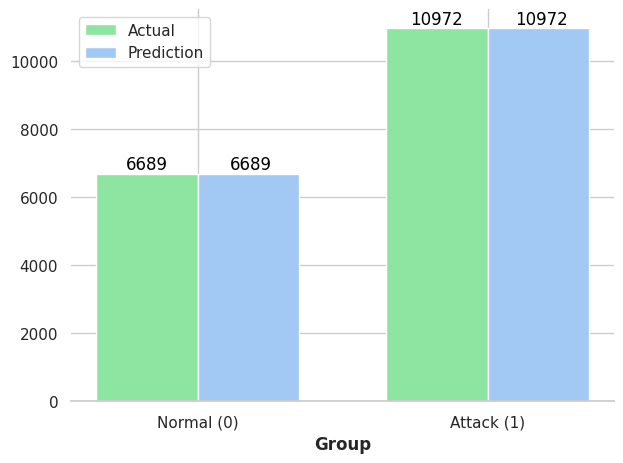

In [228]:
import seaborn as sns
import matplotlib.pyplot as plt



# Count the occurrences of each label
actual_counts = actual_labels.value_counts().sort_index()
predicted_counts = predictions.value_counts().sort_index()

# Create lists to store the counts and labels
labels = ['Normal (0)', 'Attack (1)']
actual_counts_list = [actual_counts[0], actual_counts[1]]
predicted_counts_list = [predicted_counts[0], predicted_counts[1]]

# Set the width of the bars
bar_width = 0.35

# Set the position of the bars on the x-axis
r1 = range(len(labels))
r2 = [x + bar_width for x in r1]

# Set seaborn style
sns.set_style("whitegrid")

# Plotting the bars
plt.bar(r1, actual_counts_list, color=sns.color_palette("pastel")[2], width=bar_width, label='Actual')
plt.bar(r2, predicted_counts_list, color=sns.color_palette("pastel")[0], width=bar_width, label='Prediction')

# Add xticks on the middle of the group bars
plt.xlabel('Group', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(labels))], labels)
# Add data labels
for i, count in enumerate(actual_counts_list):
    plt.text(i , count + 0.05, str(count), color='black',ha='center', va='bottom')

for i, count in enumerate(predicted_counts_list):
    plt.text(i + 0.36, count + 0.05, str(count), color='black',ha='center', va='bottom')
# Add a legend
plt.legend()

# Adding plot borders
sns.despine(left=True)

plt.tight_layout()
output_path = '/kaggle/working/Distribution_of_attacks.png'
plt.savefig(output_path, bbox_inches='tight')
plt.show()


In [229]:

predictions = filtered_df1_1['PLC_output']

# Network Traffic Data Ungroupped

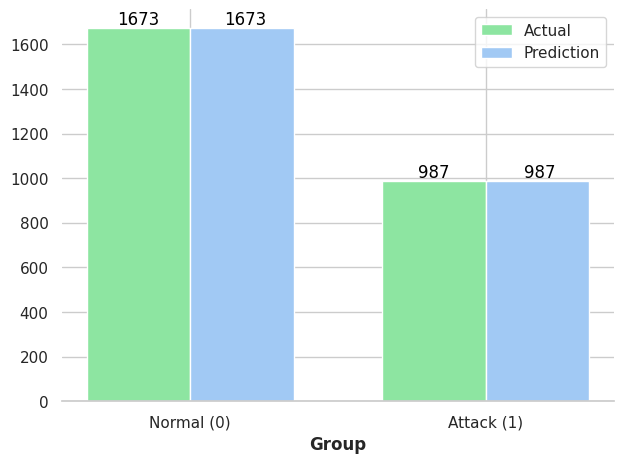

In [230]:
import seaborn as sns
import matplotlib.pyplot as plt

actual_labels2 = filtered_df1_2['label']
actual_labels2 = filtered_df1_2['label'].map({'Normal': 0, 'Abnormal': 1})
predictions2 = filtered_df1_2['Network_output']
# Count the occurrences of each label
actual_counts = actual_labels2.value_counts().sort_index()
predicted_counts = predictions2.value_counts().sort_index()

# Create lists to store the counts and labels
labels = ['Normal (0)', 'Attack (1)']
actual_counts_list = [actual_counts[0], actual_counts[1]]
predicted_counts_list = [predicted_counts[0], predicted_counts[1]]

# Set the width of the bars
bar_width = 0.35

# Set the position of the bars on the x-axis
r1 = range(len(labels))
r2 = [x + bar_width for x in r1]

# Set seaborn style
sns.set_style("whitegrid")

# Plotting the bars
plt.bar(r1, actual_counts_list, color=sns.color_palette("pastel")[2], width=bar_width, label='Actual')
plt.bar(r2, predicted_counts_list, color=sns.color_palette("pastel")[0], width=bar_width, label='Prediction')

# Add xticks on the middle of the group bars
plt.xlabel('Group', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(labels))], labels)
# Add data labels
for i, count in enumerate(actual_counts_list):
    plt.text(i , count + 0.05, str(count), color='black',ha='center', va='bottom')

for i, count in enumerate(predicted_counts_list):
    plt.text(i + 0.36, count + 0.05, str(count), color='black',ha='center', va='bottom')
# Add a legend
plt.legend()

# Adding plot borders
sns.despine(left=True)

plt.tight_layout()
output_path = '/kaggle/working/Distribution_of_attacks_Network.png'
plt.savefig(output_path, bbox_inches='tight')
plt.show()


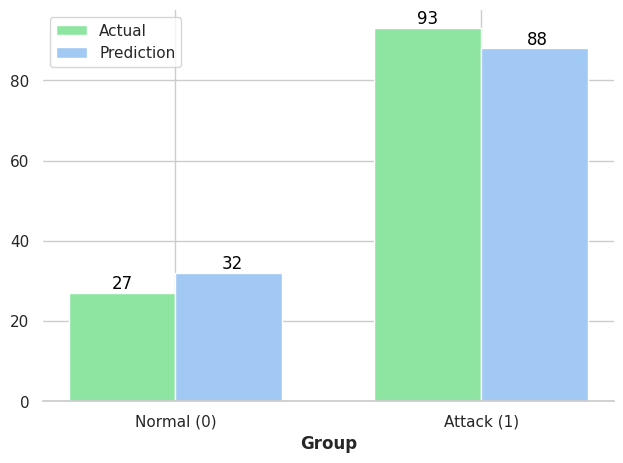

In [231]:
import seaborn as sns
import matplotlib.pyplot as plt

Network_output_actual = final_data['Network_output_actual']
Network_output = final_data['Network_output']
# Count the occurrences of each label
actual_counts_group = Network_output_actual.value_counts().sort_index()
predicted_counts_group = Network_output.value_counts().sort_index()

# Create lists to store the counts and labels
labels = ['Normal (0)', 'Attack (1)']
actual_counts_list = [actual_counts_group[0], actual_counts_group[1]]
predicted_counts_list = [predicted_counts_group[0], predicted_counts_group[1]]

# Set the width of the bars
bar_width = 0.35

# Set the position of the bars on the x-axis
r1 = range(len(labels))
r2 = [x + bar_width for x in r1]

# Set seaborn style
sns.set_style("whitegrid")

# Plotting the bars
plt.bar(r1, actual_counts_list, color=sns.color_palette("pastel")[2], width=bar_width, label='Actual')
plt.bar(r2, predicted_counts_list, color=sns.color_palette("pastel")[0], width=bar_width, label='Prediction')

# Add xticks on the middle of the group bars
plt.xlabel('Group', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(labels))], labels)
# Add data labels
for i, count in enumerate(actual_counts_list):
    plt.text(i , count + 0.05, str(count), color='black',ha='center', va='bottom')

for i, count in enumerate(predicted_counts_list):
    plt.text(i + 0.36, count + 0.05, str(count), color='black',ha='center', va='bottom')
# Add a legend
plt.legend()

# Adding plot borders
sns.despine(left=True)

plt.tight_layout()
output_path = '/kaggle/working/Distribution_of_attacks_IT.png'
plt.savefig(output_path, bbox_inches='tight')
plt.show()


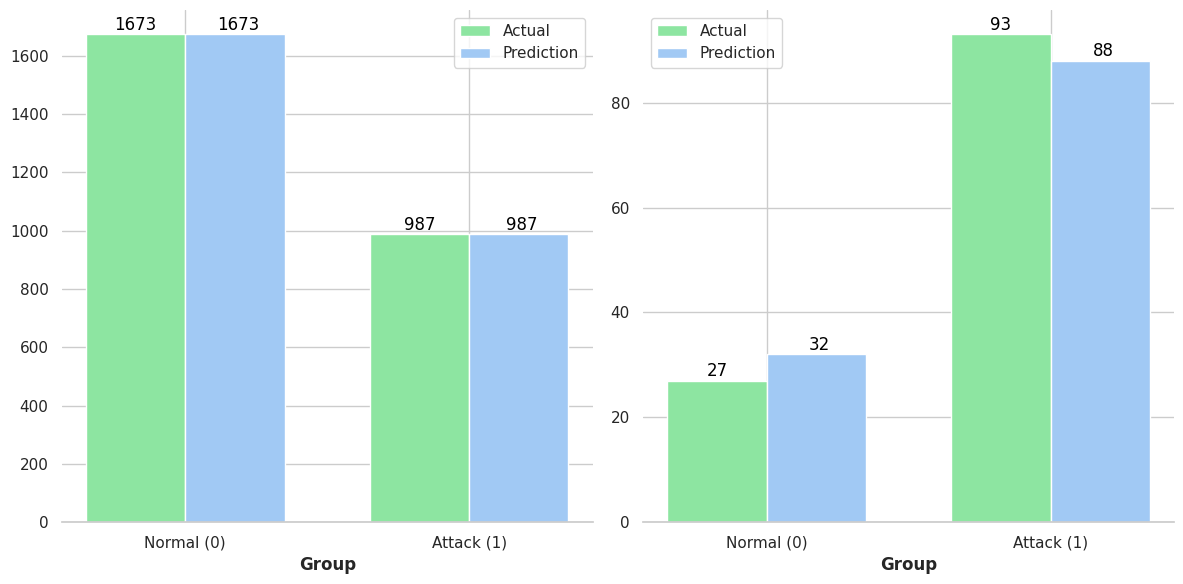

In [232]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the Network data
actual_labels2 = filtered_df1_2['label'].map({'Normal': 0, 'Abnormal': 1})
predictions2 = filtered_df1_2['Network_output']
actual_counts = actual_labels2.value_counts().sort_index()
predicted_counts = predictions2.value_counts().sort_index()

labels = ['Normal (0)', 'Attack (1)']
actual_counts_list = [actual_counts[0], actual_counts[1]]
predicted_counts_list = [predicted_counts[0], predicted_counts[1]]

bar_width = 0.35
r1 = range(len(labels))
r2 = [x + bar_width for x in r1]

sns.set_style("whitegrid")
axs[0].bar(r1, actual_counts_list, color=sns.color_palette("pastel")[2], width=bar_width, label='Actual')
axs[0].bar(r2, predicted_counts_list, color=sns.color_palette("pastel")[0], width=bar_width, label='Prediction')

axs[0].set_xlabel('Group', fontweight='bold')
axs[0].set_xticks([r + bar_width/2 for r in range(len(labels))])
axs[0].set_xticklabels(labels)

for i, count in enumerate(actual_counts_list):
    axs[0].text(i , count + 0.05, str(count), color='black', ha='center', va='bottom')

for i, count in enumerate(predicted_counts_list):
    axs[0].text(i + 0.36, count + 0.05, str(count), color='black', ha='center', va='bottom')

axs[0].legend()
sns.despine(left=True)

# Plotting the IT data
Network_output_actual = final_data['Network_output_actual']
Network_output = final_data['Network_output']
actual_counts_group = Network_output_actual.value_counts().sort_index()
predicted_counts_group = Network_output.value_counts().sort_index()

actual_counts_list = [actual_counts_group[0], actual_counts_group[1]]
predicted_counts_list = [predicted_counts_group[0], predicted_counts_group[1]]

sns.set_style("whitegrid")
axs[1].bar(r1, actual_counts_list, color=sns.color_palette("pastel")[2], width=bar_width, label='Actual')
axs[1].bar(r2, predicted_counts_list, color=sns.color_palette("pastel")[0], width=bar_width, label='Prediction')

axs[1].set_xlabel('Group', fontweight='bold')
axs[1].set_xticks([r + bar_width/2 for r in range(len(labels))])
axs[1].set_xticklabels(labels)

for i, count in enumerate(actual_counts_list):
    axs[1].text(i , count + 0.05, str(count), color='black', ha='center', va='bottom')

for i, count in enumerate(predicted_counts_list):
    axs[1].text(i + 0.36, count + 0.05, str(count), color='black', ha='center', va='bottom')

axs[1].legend()
sns.despine(left=True)

# Save or show the plot
plt.tight_layout()
plt.savefig('/kaggle/working/Distribution_of_attacks_combined.png', bbox_inches='tight')
plt.show()


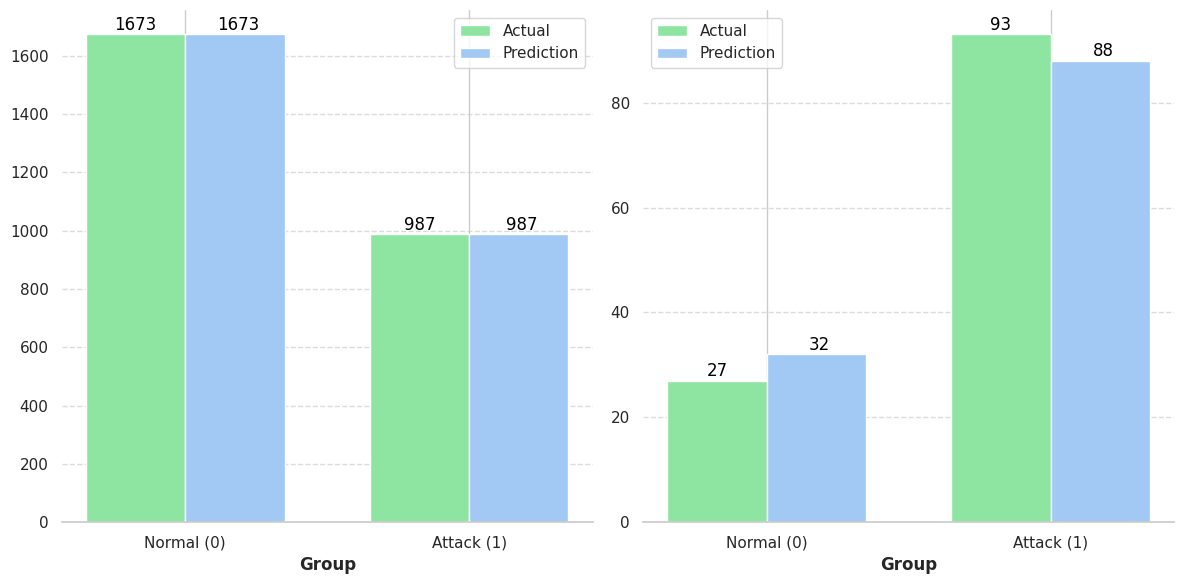

In [233]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the Network data
actual_labels2 = filtered_df1_2['label'].map({'Normal': 0, 'Abnormal': 1})
predictions2 = filtered_df1_2['Network_output']
actual_counts = actual_labels2.value_counts().sort_index()
predicted_counts = predictions2.value_counts().sort_index()

labels = ['Normal (0)', 'Attack (1)']
actual_counts_list = [actual_counts[0], actual_counts[1]]
predicted_counts_list = [predicted_counts[0], predicted_counts[1]]

bar_width = 0.35
r1 = range(len(labels))
r2 = [x + bar_width for x in r1]

sns.set_style("whitegrid")

# Plotting the Network data
axs[0].bar(r1, actual_counts_list, color=sns.color_palette("pastel")[2], width=bar_width, label='Actual')
axs[0].bar(r2, predicted_counts_list, color=sns.color_palette("pastel")[0], width=bar_width, label='Prediction')

axs[0].set_xlabel('Group', fontweight='bold')
axs[0].set_xticks([r + bar_width/2 for r in range(len(labels))])
axs[0].set_xticklabels(labels)

for i, count in enumerate(actual_counts_list):
    axs[0].text(i , count + 0.05, str(count), color='black', ha='center', va='bottom')

for i, count in enumerate(predicted_counts_list):
    axs[0].text(i + 0.36, count + 0.05, str(count), color='black', ha='center', va='bottom')

axs[0].legend()
axs[0].grid(True, axis='y', linestyle='--', alpha=0.7)  # Adjust grid parameters
sns.despine(left=True)

# Plotting the IT data
Network_output_actual = final_data['Network_output_actual']
Network_output = final_data['Network_output']
actual_counts_group = Network_output_actual.value_counts().sort_index()
predicted_counts_group = Network_output.value_counts().sort_index()

actual_counts_list = [actual_counts_group[0], actual_counts_group[1]]
predicted_counts_list = [predicted_counts_group[0], predicted_counts_group[1]]

# Plotting the IT data
axs[1].bar(r1, actual_counts_list, color=sns.color_palette("pastel")[2], width=bar_width, label='Actual')
axs[1].bar(r2, predicted_counts_list, color=sns.color_palette("pastel")[0], width=bar_width, label='Prediction')

axs[1].set_xlabel('Group', fontweight='bold')
axs[1].set_xticks([r + bar_width/2 for r in range(len(labels))])
axs[1].set_xticklabels(labels)

for i, count in enumerate(actual_counts_list):
    axs[1].text(i , count + 0.05, str(count), color='black', ha='center', va='bottom')

for i, count in enumerate(predicted_counts_list):
    axs[1].text(i + 0.36, count + 0.05, str(count), color='black', ha='center', va='bottom')

axs[1].legend()
axs[1].grid(True, axis='y', linestyle='--', alpha=0.7)  # Adjust grid parameters
sns.despine(left=True)

# Save or show the plot
plt.tight_layout()
plt.savefig('/kaggle/working/Distribution_of_attacks_combined.png', bbox_inches='tight')
plt.show()


# PLC Data ungroupped

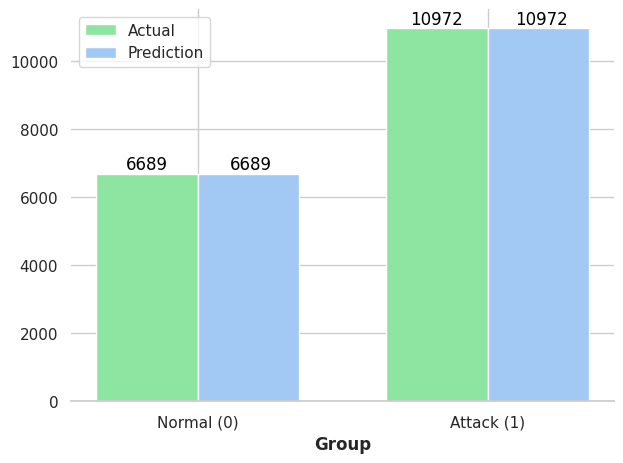

In [234]:
import seaborn as sns
import matplotlib.pyplot as plt

actual_labels1 = filtered_df1_1['label']
actual_labels1 = filtered_df1_1['label'].map({'Normal': 0, 'Abnormal': 1})
predictions1 = filtered_df1_1['PLC_output']
# Count the occurrences of each label
actual_counts = actual_labels1.value_counts().sort_index()
predicted_counts = predictions1.value_counts().sort_index()

# Create lists to store the counts and labels
labels = ['Normal (0)', 'Attack (1)']
actual_counts_list = [actual_counts[0], actual_counts[1]]
predicted_counts_list = [predicted_counts[0], predicted_counts[1]]

# Set the width of the bars
bar_width = 0.35

# Set the position of the bars on the x-axis
r1 = range(len(labels))
r2 = [x + bar_width for x in r1]

# Set seaborn style
sns.set_style("whitegrid")

# Plotting the bars
plt.bar(r1, actual_counts_list, color=sns.color_palette("pastel")[2], width=bar_width, label='Actual')
plt.bar(r2, predicted_counts_list, color=sns.color_palette("pastel")[0], width=bar_width, label='Prediction')

# Add xticks on the middle of the group bars
plt.xlabel('Group', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(labels))], labels)
# Add data labels
for i, count in enumerate(actual_counts_list):
    plt.text(i , count + 0.05, str(count), color='black',ha='center', va='bottom')

for i, count in enumerate(predicted_counts_list):
    plt.text(i + 0.36, count + 0.05, str(count), color='black',ha='center', va='bottom')
# Add a legend
plt.legend()

# Adding plot borders
sns.despine(left=True)

plt.tight_layout()
output_path = '/kaggle/working/Distribution_of_attacks_plc.png'
plt.savefig(output_path, bbox_inches='tight')
plt.show()


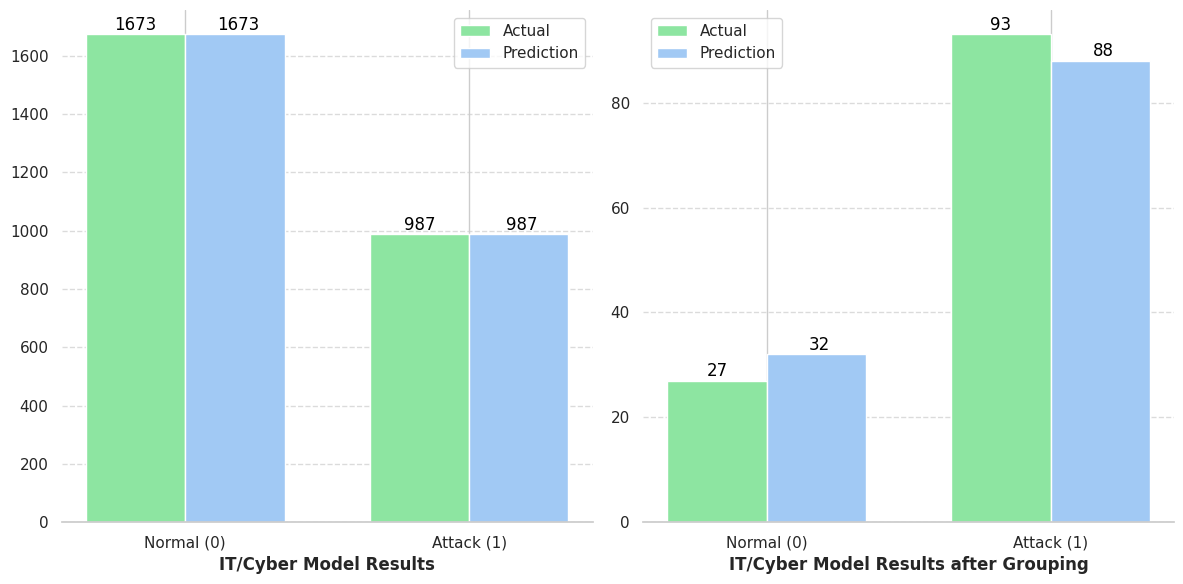

In [235]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plotting the first set of data
actual_labels2 = filtered_df1_2['label'].map({'Normal': 0, 'Abnormal': 1})
predictions2 = filtered_df1_2['Network_output']
actual_counts = actual_labels2.value_counts().sort_index()
predicted_counts = predictions2.value_counts().sort_index()

labels = ['Normal (0)', 'Attack (1)']
actual_counts_list = [actual_counts[0], actual_counts[1]]
predicted_counts_list = [predicted_counts[0], predicted_counts[1]]

bar_width = 0.35
r1 = range(len(labels))
r2 = [x + bar_width for x in r1]

sns.set_style("whitegrid")
axs[0].bar(r1, actual_counts_list, color=sns.color_palette("pastel")[2], width=bar_width, label='Actual')
axs[0].bar(r2, predicted_counts_list, color=sns.color_palette("pastel")[0], width=bar_width, label='Prediction')

axs[0].set_xlabel('IT/Cyber Model Results', fontweight='bold')
axs[0].set_xticks([r + bar_width/2 for r in range(len(labels))])
axs[0].set_xticklabels(labels)

for i, count in enumerate(actual_counts_list):
    axs[0].text(i , count + 0.05, str(count), color='black', ha='center', va='bottom')

for i, count in enumerate(predicted_counts_list):
    axs[0].text(i + 0.36, count + 0.05, str(count), color='black', ha='center', va='bottom')

axs[0].legend()
axs[0].grid(True, axis='y', linestyle='--', alpha=0.7)  # Adjust grid parameters
sns.despine(left=True)

# Plotting the second set of data
actual_counts_group = final_data['Network_output_actual'].value_counts().sort_index()
predicted_counts_group = final_data['Network_output'].value_counts().sort_index()

actual_counts_list = [actual_counts_group[0], actual_counts_group[1]]
predicted_counts_list = [predicted_counts_group[0], predicted_counts_group[1]]

sns.set_style("whitegrid")
axs[1].bar(r1, actual_counts_list, color=sns.color_palette("pastel")[2], width=bar_width, label='Actual')
axs[1].bar(r2, predicted_counts_list, color=sns.color_palette("pastel")[0], width=bar_width, label='Prediction')

axs[1].set_xlabel('IT/Cyber Model Results after Grouping', fontweight='bold')
axs[1].set_xticks([r + bar_width/2 for r in range(len(labels))])
axs[1].set_xticklabels(labels)

for i, count in enumerate(actual_counts_list):
    axs[1].text(i , count + 0.05, str(count), color='black', ha='center', va='bottom')

for i, count in enumerate(predicted_counts_list):
    axs[1].text(i + 0.36, count + 0.05, str(count), color='black', ha='center', va='bottom')

axs[1].legend()
axs[1].grid(True, axis='y', linestyle='--', alpha=0.7)  # Adjust grid parameters
sns.despine(left=True)

# Save or show the plot
plt.tight_layout()
plt.savefig('/kaggle/working/Distribution_of_attacks_combined_IT_network.png', bbox_inches='tight')
plt.show()


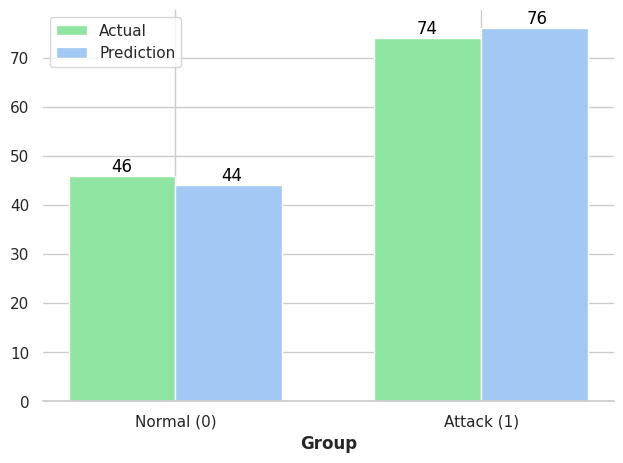

In [236]:
import seaborn as sns
import matplotlib.pyplot as plt

PLC_output_actual = final_data['PLC_output_actual']
PLC_output = final_data['PLC_output']
# Count the occurrences of each label
actual_counts_group = PLC_output_actual.value_counts().sort_index()
predicted_counts_group = PLC_output.value_counts().sort_index()

# Create lists to store the counts and labels
labels = ['Normal (0)', 'Attack (1)']
actual_counts_list = [actual_counts_group[0], actual_counts_group[1]]
predicted_counts_list = [predicted_counts_group[0], predicted_counts_group[1]]

# Set the width of the bars
bar_width = 0.35

# Set the position of the bars on the x-axis
r1 = range(len(labels))
r2 = [x + bar_width for x in r1]

# Set seaborn style
sns.set_style("whitegrid")

# Plotting the bars
plt.bar(r1, actual_counts_list, color=sns.color_palette("pastel")[2], width=bar_width, label='Actual')
plt.bar(r2, predicted_counts_list, color=sns.color_palette("pastel")[0], width=bar_width, label='Prediction')

# Add xticks on the middle of the group bars
plt.xlabel('Group', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(labels))], labels)
# Add data labels
for i, count in enumerate(actual_counts_list):
    plt.text(i , count + 0.05, str(count), color='black',ha='center', va='bottom')

for i, count in enumerate(predicted_counts_list):
    plt.text(i + 0.36, count + 0.05, str(count), color='black',ha='center', va='bottom')
# Add a legend
plt.legend()

# Adding plot borders
sns.despine(left=True)

plt.tight_layout()
output_path = '/kaggle/working/Distribution_of_attacks_ICS.png'
plt.savefig(output_path, bbox_inches='tight')
plt.show()


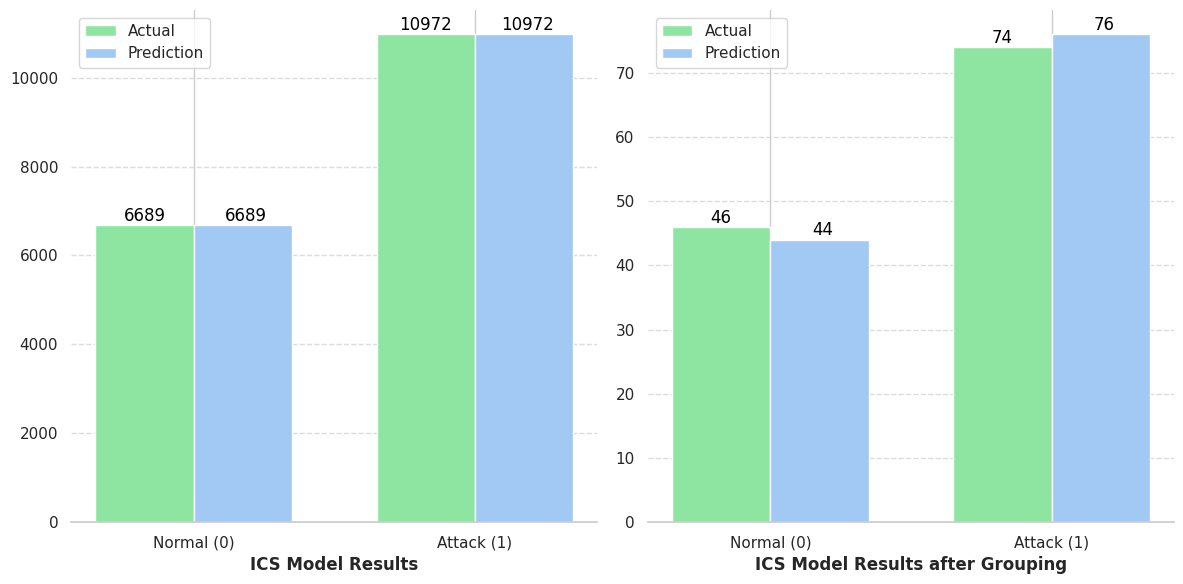

In [237]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plotting the first set of data
actual_labels1 = filtered_df1_1['label'].map({'Normal': 0, 'Abnormal': 1})
predictions1 = filtered_df1_1['PLC_output']
actual_counts = actual_labels1.value_counts().sort_index()
predicted_counts = predictions1.value_counts().sort_index()

labels = ['Normal (0)', 'Attack (1)']
actual_counts_list = [actual_counts[0], actual_counts[1]]
predicted_counts_list = [predicted_counts[0], predicted_counts[1]]

bar_width = 0.35
r1 = range(len(labels))
r2 = [x + bar_width for x in r1]

sns.set_style("whitegrid")
axs[0].bar(r1, actual_counts_list, color=sns.color_palette("pastel")[2], width=bar_width, label='Actual')
axs[0].bar(r2, predicted_counts_list, color=sns.color_palette("pastel")[0], width=bar_width, label='Prediction')

axs[0].set_xlabel('ICS Model Results', fontweight='bold')
axs[0].set_xticks([r + bar_width/2 for r in range(len(labels))])
axs[0].set_xticklabels(labels)

for i, count in enumerate(actual_counts_list):
    axs[0].text(i , count + 0.05, str(count), color='black', ha='center', va='bottom')

for i, count in enumerate(predicted_counts_list):
    axs[0].text(i + 0.36, count + 0.05, str(count), color='black', ha='center', va='bottom')

axs[0].legend()
axs[0].grid(True, axis='y', linestyle='--', alpha=0.7)  # Adjust grid parameters
sns.despine(left=True)

# Plotting the second set of data
actual_counts_group = final_data['PLC_output_actual'].value_counts().sort_index()
predicted_counts_group = final_data['PLC_output'].value_counts().sort_index()

actual_counts_list = [actual_counts_group[0], actual_counts_group[1]]
predicted_counts_list = [predicted_counts_group[0], predicted_counts_group[1]]

sns.set_style("whitegrid")
axs[1].bar(r1, actual_counts_list, color=sns.color_palette("pastel")[2], width=bar_width, label='Actual')
axs[1].bar(r2, predicted_counts_list, color=sns.color_palette("pastel")[0], width=bar_width, label='Prediction')

axs[1].set_xlabel('ICS Model Results after Grouping', fontweight='bold')
axs[1].set_xticks([r + bar_width/2 for r in range(len(labels))])
axs[1].set_xticklabels(labels)

for i, count in enumerate(actual_counts_list):
    axs[1].text(i , count + 0.05, str(count), color='black', ha='center', va='bottom')

for i, count in enumerate(predicted_counts_list):
    axs[1].text(i + 0.36, count + 0.05, str(count), color='black', ha='center', va='bottom')

axs[1].legend()
axs[1].grid(True, axis='y', linestyle='--', alpha=0.7)  # Adjust grid parameters
sns.despine(left=True)

# Save or show the plot
plt.tight_layout()
plt.savefig('/kaggle/working/Distribution_of_attacks_combined_plc.png', bbox_inches='tight')
plt.show()


# Process Model Ungroupped

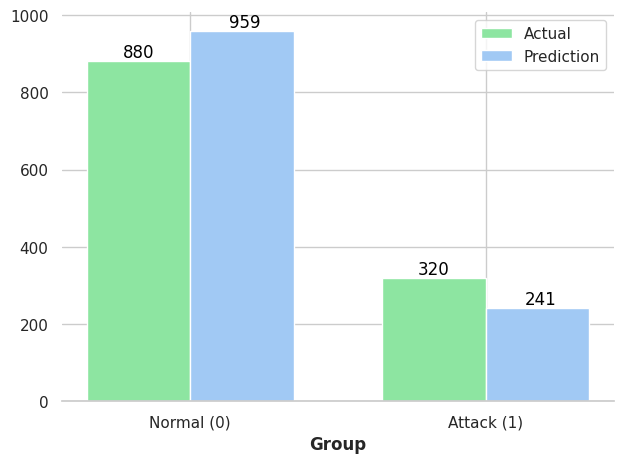

In [238]:
import seaborn as sns
import matplotlib.pyplot as plt

actual_labels3 = filtered_df1_3['label']
actual_labels3 = filtered_df1_3['label'].map({'Normal': 0, 'Abnormal': 1})
predictions3 = filtered_df1_3['Process_output']
# Count the occurrences of each label
actual_counts = actual_labels3.value_counts().sort_index()
predicted_counts = predictions3.value_counts().sort_index()

# Create lists to store the counts and labels
labels = ['Normal (0)', 'Attack (1)']
actual_counts_list = [actual_counts[0], actual_counts[1]]
predicted_counts_list = [predicted_counts[0], predicted_counts[1]]

# Set the width of the bars
bar_width = 0.35

# Set the position of the bars on the x-axis
r1 = range(len(labels))
r2 = [x + bar_width for x in r1]

# Set seaborn style
sns.set_style("whitegrid")

# Plotting the bars
plt.bar(r1, actual_counts_list, color=sns.color_palette("pastel")[2], width=bar_width, label='Actual')
plt.bar(r2, predicted_counts_list, color=sns.color_palette("pastel")[0], width=bar_width, label='Prediction')

# Add xticks on the middle of the group bars
plt.xlabel('Group', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(labels))], labels)
# Add data labels
for i, count in enumerate(actual_counts_list):
    plt.text(i , count + 0.05, str(count), color='black',ha='center', va='bottom')

for i, count in enumerate(predicted_counts_list):
    plt.text(i + 0.36, count + 0.05, str(count), color='black',ha='center', va='bottom')
# Add a legend
plt.legend()

# Adding plot borders
sns.despine(left=True)

plt.tight_layout()
output_path = '/kaggle/working/Distribution_of_attacks_process.png'
plt.savefig(output_path, bbox_inches='tight')
plt.show()


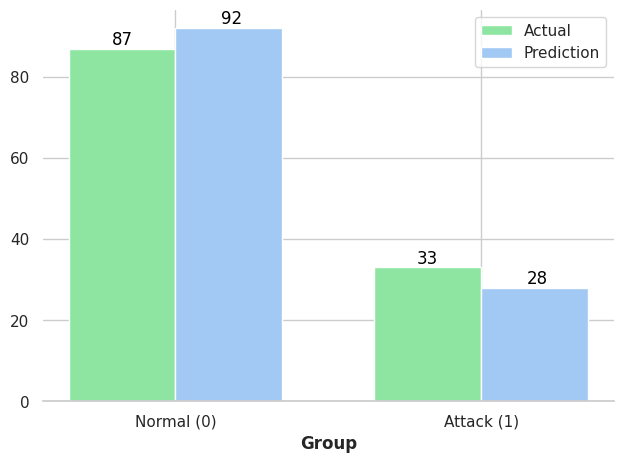

In [239]:
import seaborn as sns
import matplotlib.pyplot as plt

PLC_output_actual = final_data['Process_output_actual']
PLC_output = final_data['Process_output']
# Count the occurrences of each label
actual_counts_group = PLC_output_actual.value_counts().sort_index()
predicted_counts_group = PLC_output.value_counts().sort_index()

# Create lists to store the counts and labels
labels = ['Normal (0)', 'Attack (1)']
actual_counts_list = [actual_counts_group[0], actual_counts_group[1]]
predicted_counts_list = [predicted_counts_group[0], predicted_counts_group[1]]

# Set the width of the bars
bar_width = 0.35

# Set the position of the bars on the x-axis
r1 = range(len(labels))
r2 = [x + bar_width for x in r1]

# Set seaborn style
sns.set_style("whitegrid")

# Plotting the bars
plt.bar(r1, actual_counts_list, color=sns.color_palette("pastel")[2], width=bar_width, label='Actual')
plt.bar(r2, predicted_counts_list, color=sns.color_palette("pastel")[0], width=bar_width, label='Prediction')

# Add xticks on the middle of the group bars
plt.xlabel('Group', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(labels))], labels)
# Add data labels
for i, count in enumerate(actual_counts_list):
    plt.text(i , count + 0.05, str(count), color='black',ha='center', va='bottom')

for i, count in enumerate(predicted_counts_list):
    plt.text(i + 0.36, count + 0.05, str(count), color='black',ha='center', va='bottom')
# Add a legend
plt.legend()

# Adding plot borders
sns.despine(left=True)

plt.tight_layout()
output_path = '/kaggle/working/Distribution_of_attacks_Processmodel.png'
plt.savefig(output_path, bbox_inches='tight')
plt.show()


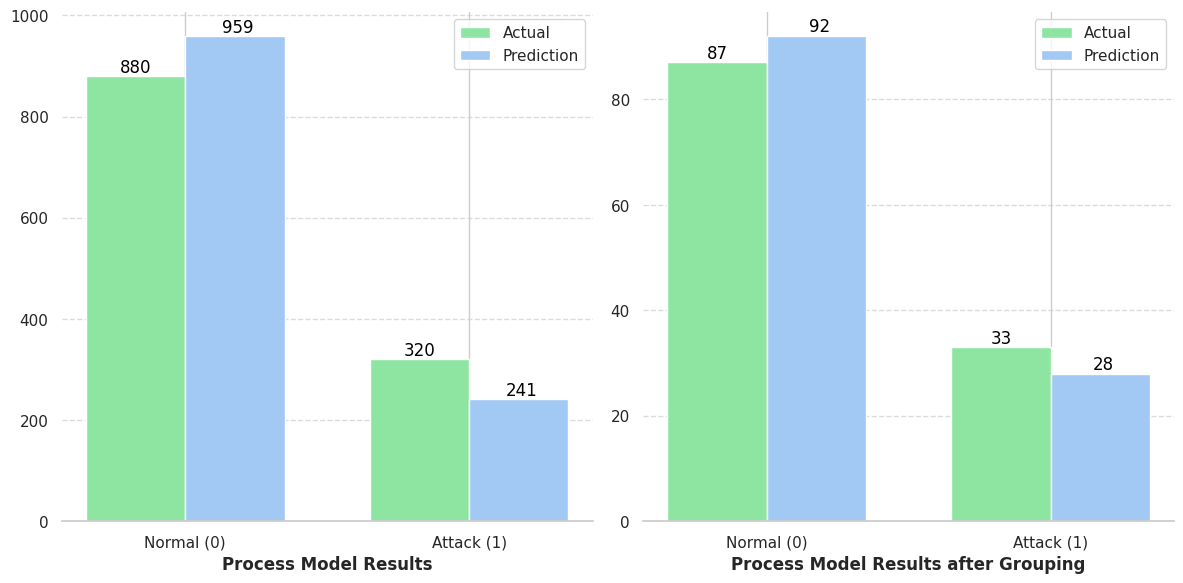

In [240]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plotting the first set of data
actual_labels3 = filtered_df1_3['label'].map({'Normal': 0, 'Abnormal': 1})
predictions3 = filtered_df1_3['Process_output']
actual_counts = actual_labels3.value_counts().sort_index()
predicted_counts = predictions3.value_counts().sort_index()

labels = ['Normal (0)', 'Attack (1)']
actual_counts_list = [actual_counts[0], actual_counts[1]]
predicted_counts_list = [predicted_counts[0], predicted_counts[1]]

bar_width = 0.35
r1 = range(len(labels))
r2 = [x + bar_width for x in r1]

sns.set_style("whitegrid")
axs[0].bar(r1, actual_counts_list, color=sns.color_palette("pastel")[2], width=bar_width, label='Actual')
axs[0].bar(r2, predicted_counts_list, color=sns.color_palette("pastel")[0], width=bar_width, label='Prediction')

axs[0].set_xlabel('Process Model Results', fontweight='bold')
axs[0].set_xticks([r + bar_width/2 for r in range(len(labels))])
axs[0].set_xticklabels(labels)

for i, count in enumerate(actual_counts_list):
    axs[0].text(i , count + 0.05, str(count), color='black', ha='center', va='bottom')

for i, count in enumerate(predicted_counts_list):
    axs[0].text(i + 0.36, count + 0.05, str(count), color='black', ha='center', va='bottom')

axs[0].legend()
axs[0].grid(True, axis='y', linestyle='--', alpha=0.7)  # Adjust grid parameters
sns.despine(left=True)

# Adjust layout and add space between plots
plt.subplots_adjust(wspace=0.5)

# Plotting the second set of data
PLC_output_actual = final_data['Process_output_actual']
PLC_output = final_data['Process_output']
actual_counts_group = PLC_output_actual.value_counts().sort_index()
predicted_counts_group = PLC_output.value_counts().sort_index()

actual_counts_list = [actual_counts_group[0], actual_counts_group[1]]
predicted_counts_list = [predicted_counts_group[0], predicted_counts_group[1]]

sns.set_style("whitegrid")
axs[1].bar(r1, actual_counts_list, color=sns.color_palette("pastel")[2], width=bar_width, label='Actual')
axs[1].bar(r2, predicted_counts_list, color=sns.color_palette("pastel")[0], width=bar_width, label='Prediction')

axs[1].set_xlabel('Process Model Results after Grouping', fontweight='bold')
axs[1].set_xticks([r + bar_width/2 for r in range(len(labels))])
axs[1].set_xticklabels(labels)

for i, count in enumerate(actual_counts_list):
    axs[1].text(i , count + 0.05, str(count), color='black', ha='center', va='bottom')

for i, count in enumerate(predicted_counts_list):
    axs[1].text(i + 0.36, count + 0.05, str(count), color='black', ha='center', va='bottom')

axs[1].legend()
axs[1].grid(True, axis='y', linestyle='--', alpha=0.7)  # Adjust grid parameters
sns.despine(left=True)

# Save or show the plot
plt.tight_layout()
plt.savefig('/kaggle/working/Distribution_of_attacks_combined_process.png', bbox_inches='tight')
plt.show()


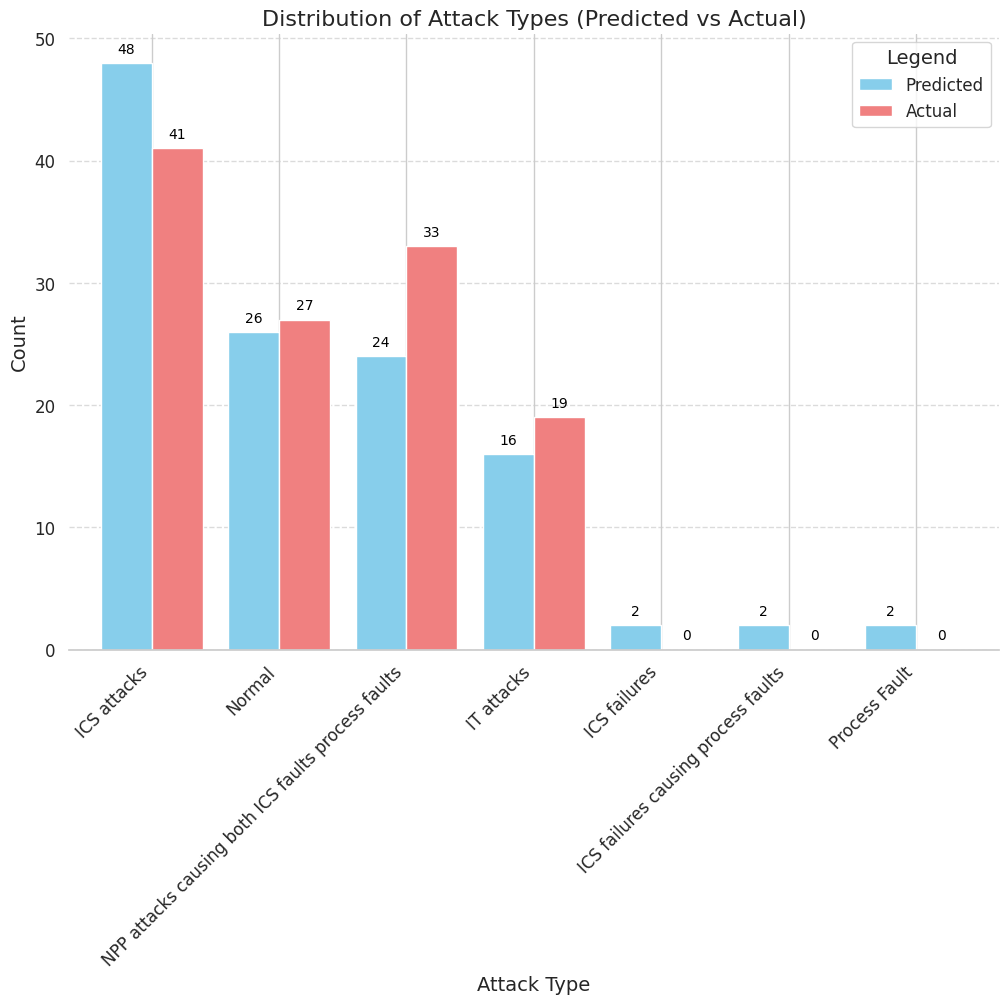

In [241]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set(style="whitegrid", palette="pastel")

# Assuming 'final_data' is your DataFrame containing the 'Attack_Type' and 'Attack_Type_actual' columns

# Get value counts of 'Attack_Type' and 'Attack_Type_actual' and sort by count in descending order
attack_type_counts_pred = final_data['Attack_Type'].value_counts()
attack_type_counts_actual = final_data['Attack_Type_actual'].value_counts()

# Concatenate the two Series for plotting
combined_counts = pd.concat([attack_type_counts_pred, attack_type_counts_actual], axis=1, keys=['Predicted', 'Actual'])

# Plotting the bar chart
ax = combined_counts.plot(kind='bar', figsize=(12, 8), width=0.8, color=['skyblue', 'lightcoral'])

# Customizing plot aesthetics
ax.set_title('Distribution of Attack Types (Predicted vs Actual)', fontsize=16)
ax.set_xlabel('Attack Type', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Adding legend
plt.legend(title='Legend', title_fontsize='14', fontsize='12')

# Adding numbers on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')

# Adding grid lines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adding plot borders
sns.despine(left=True)

# Save the combined plot
output_path = '/kaggle/working/Distribution_of_attacks_combined.png'
plt.savefig(output_path, bbox_inches='tight')

# Show the combined plot
plt.show()


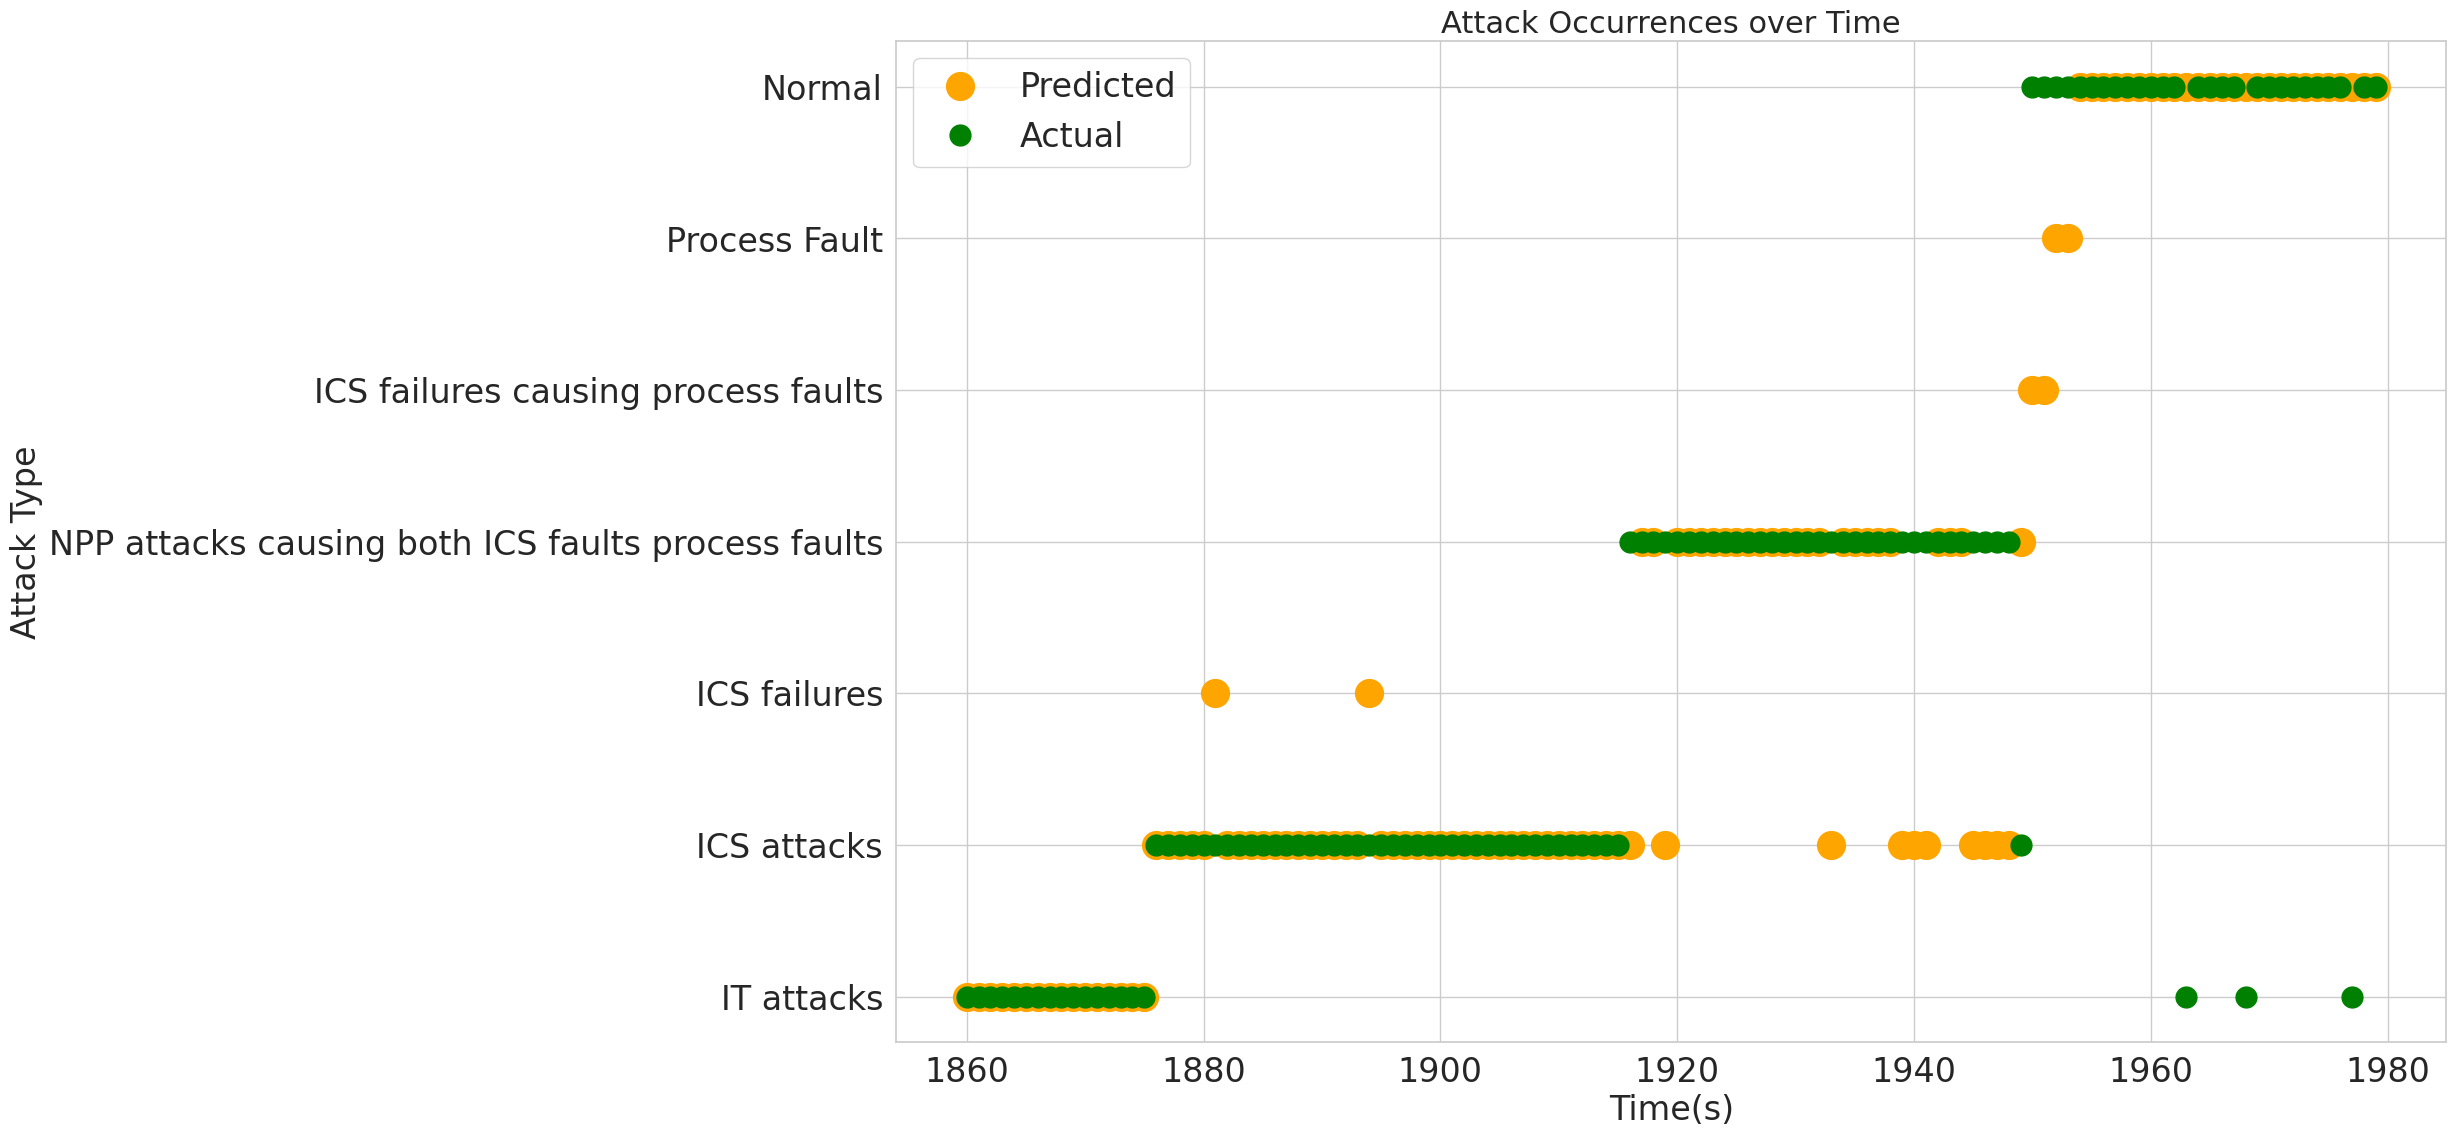

In [242]:
import seaborn as sns
import matplotlib.pyplot as plt



# Create a new figure for attack occurrences over time
plt.figure(figsize=(20, 13))

# Convert 'Minute' and 'Second' to a time representation for plotting
final_data['Time'] = final_data['Minute'] * 60 + final_data['Second']

# Filter data to get attack times
attack_data = final_data[final_data['Attack_Type'].isin(['ICS attacks',
'ICS failures',
'ICS failures causing process faults',
'IT attacks',
'Normal',
'NPP attacks causing both ICS faults process faults',
'Process Fault'])]  # Adjust based on your actual attack types

# Plotting the attack occurrences
plt.plot(final_data['Time'], final_data['Attack_Type'], marker='o', markersize=20,linestyle='', label='Predicted', color='orange')
plt.plot(final_data['Time'], final_data['Attack_Type_actual'], marker='o',markersize=15, linestyle='', label='Actual', color='green')  # Adjust color and label


# Customize the plot
plt.xlabel('Time(s)',fontsize=24)
plt.ylabel('Attack Type',fontsize=24)
plt.title('Attack Occurrences over Time',fontsize=22)
plt.yticks(final_data['Attack_Type'].unique())  # Set the y-axis ticks based on unique attack types

# Set font size for axes labels
plt.tick_params(axis='x', labelsize=24)  # Adjust fontsize for x-axis
plt.tick_params(axis='y', labelsize=24)  # Adjust fontsize for y-axis
# Show legend
plt.legend(fontsize=24)  # Adjust fontsize here
output_path_occurrences = '/kaggle/working/Attack_Occurrences_over_Time2.png'
plt.savefig(output_path_occurrences, bbox_inches='tight')

# Show the second plot
plt.show()


In [243]:
final_data

,Minute,Second,Network_output_actual,PLC_output_actual,Process_output_actual,Attack_Type_actual,Network_output,PLC_output,Process_output,Attack_Type,Time
0,31,0,1,0,0,IT attacks,1,0,0,IT attacks,1860
1,31,1,1,0,0,IT attacks,1,0,0,IT attacks,1861
2,31,2,1,0,0,IT attacks,1,0,0,IT attacks,1862
3,31,3,1,0,0,IT attacks,1,0,0,IT attacks,1863
4,31,4,1,0,0,IT attacks,1,0,0,IT attacks,1864
...,...,...,...,...,...,...,...,...,...,...,...
115,32,55,0,0,0,Normal,0,0,0,Normal,1975
116,32,56,0,0,0,Normal,0,0,0,Normal,1976
117,32,57,1,0,0,IT attacks,0,0,0,Normal,1977
118,32,58,0,0,0,Normal,0,0,0,Normal,1978


In [244]:
# Define a function to determine the 'Result Anomaly Detection' based on given conditions
def determine_anomaly_detection(row):
    if row['Attack_Type_actual'] != 'Normal' and row['Attack_Type'] != 'Normal':
        return 'Anomaly Detected'
    elif row['Attack_Type_actual'] == 'Normal' and row['Attack_Type'] == 'Normal':
        return 'Normal Detected'
    else:
        return 'False Alarm'

# Apply the function to each row in the DataFrame to create the new column
final_data['Result Anomaly Detection'] = final_data.apply(determine_anomaly_detection, axis=1)

final_data.head()  # D

,Minute,Second,Network_output_actual,PLC_output_actual,Process_output_actual,Attack_Type_actual,Network_output,PLC_output,Process_output,Attack_Type,Time,Result Anomaly Detection
0,31,0,1,0,0,IT attacks,1,0,0,IT attacks,1860,Anomaly Detected
1,31,1,1,0,0,IT attacks,1,0,0,IT attacks,1861,Anomaly Detected
2,31,2,1,0,0,IT attacks,1,0,0,IT attacks,1862,Anomaly Detected
3,31,3,1,0,0,IT attacks,1,0,0,IT attacks,1863,Anomaly Detected
4,31,4,1,0,0,IT attacks,1,0,0,IT attacks,1864,Anomaly Detected


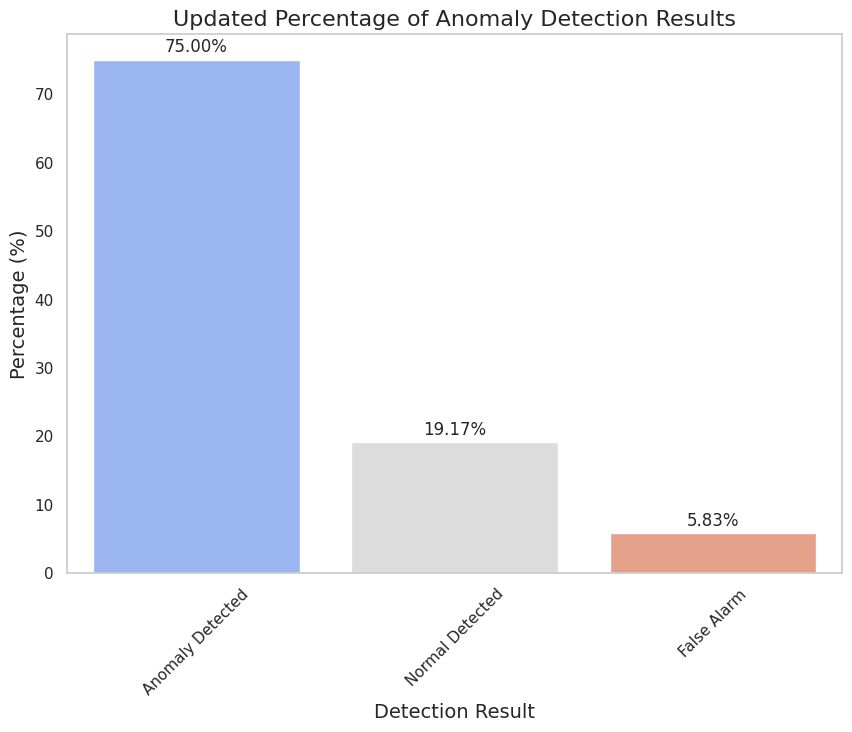

In [245]:
# Redefine the function to adjust the logic as per the updated instructions
def update_anomaly_detection(row):
    # If 'Attack_Type' is not 'Normal', it's considered an attempt to detect an attack
    if row['Attack_Type'] != 'Normal':
        # If 'Attack_Type_actual' is also not 'Normal', it means an attack was correctly detected
        if row['Attack_Type_actual'] != 'Normal':
            return 'Anomaly Detected'
        # If 'Attack_Type_actual' is 'Normal', it's a false alarm
        else:
            return 'False Alarm'
    # If 'Attack_Type' is 'Normal', and so is 'Attack_Type_actual', it's a correct detection of normal behavior
    elif row['Attack_Type'] == 'Normal' and row['Attack_Type_actual'] == 'Normal':
        return 'Normal Detected'
    # Any other case would be a false alarm, but given the logic, this case might not be possible
    else:
        return 'False Alarm'

# Apply the updated function to each row in the DataFrame
final_data['Result Anomaly Detection'] = final_data.apply(update_anomaly_detection, axis=1)

# Recalculate the percentages for the updated 'Result Anomaly Detection' column
result_detection_counts_updated = final_data['Result Anomaly Detection'].value_counts(normalize=True) * 100

# Recreate the bar plot for the updated 'Result Anomaly Detection' column with percentages on top
plt.figure(figsize=(10, 7))
barplot_detection_updated = sns.barplot(x=result_detection_counts_updated.index, y=result_detection_counts_updated.values, palette="coolwarm")

plt.title('Updated Percentage of Anomaly Detection Results', fontsize=16)
plt.xlabel('Detection Result', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')

# Adding updated percentage labels on top of each bar
for p in barplot_detection_updated.patches:
    barplot_detection_updated.annotate(f'{p.get_height():.2f}%', 
                                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                                       ha = 'center', va = 'center', 
                                       xytext = (0, 9), 
                                       textcoords = 'offset points')

plt.show()


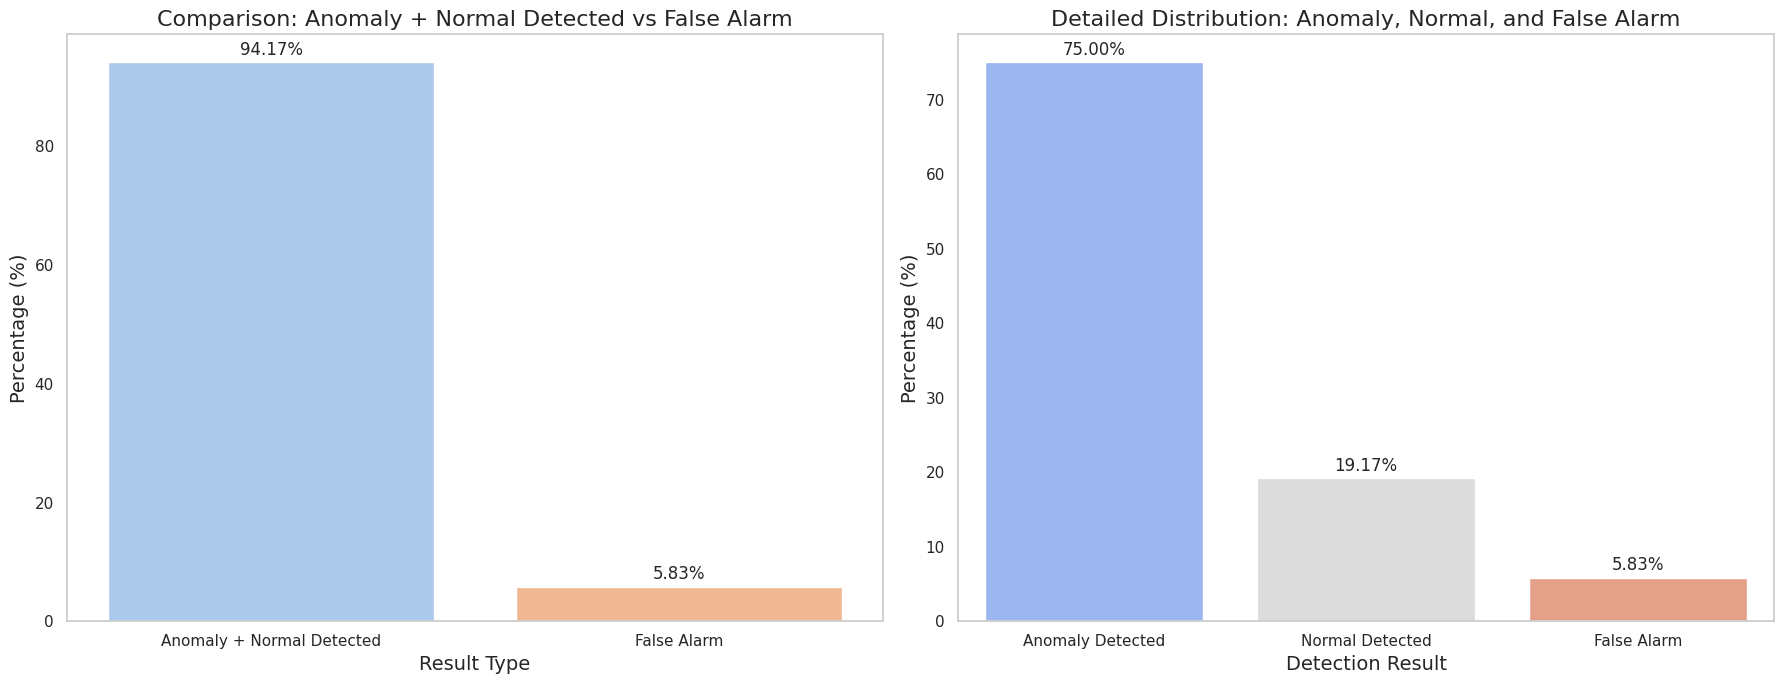

In [246]:
# Calculate the percentages for the specific combinations:
# - "Anomaly Detected" + "Normal Detected" vs "False Alarm"
# - Already have "Anomaly Detected", "Normal Detected", and "False Alarm"

# Combining "Anomaly Detected" and "Normal Detected" for comparison against "False Alarm"
anomaly_normal_sum = result_detection_counts_updated['Anomaly Detected'] + result_detection_counts_updated.get('Normal Detected', 0)
false_alarm_percentage = result_detection_counts_updated['False Alarm']

# Prepare data for the first plot
comparison_data = {
    'Result Type': ['Anomaly + Normal Detected', 'False Alarm'],
    'Percentage': [anomaly_normal_sum, false_alarm_percentage]
}

comparison_df = pd.DataFrame(comparison_data)

# Set up the matplotlib figure
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# First subplot for Anomaly + Normal Detected vs False Alarm
sns.barplot(ax=axes[0], x='Result Type', y='Percentage', data=comparison_df, palette="pastel")
axes[0].set_title('Comparison: Anomaly + Normal Detected vs False Alarm', fontsize=16)
axes[0].set_xlabel('Result Type', fontsize=14)
axes[0].set_ylabel('Percentage (%)', fontsize=14)
axes[0].grid(axis='y')

# Adding percentage labels on top of each bar in the first plot
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height():.2f}%', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 9), 
                     textcoords='offset points')

# Second subplot for detailed Anomaly Detected, Normal Detected, and False Alarm percentages
sns.barplot(ax=axes[1], x=result_detection_counts_updated.index, y=result_detection_counts_updated.values, palette="coolwarm")
axes[1].set_title('Detailed Distribution: Anomaly, Normal, and False Alarm', fontsize=16)
axes[1].set_xlabel('Detection Result', fontsize=14)
axes[1].set_ylabel('Percentage (%)', fontsize=14)
axes[1].grid(axis='y')

# Adding percentage labels on top of each bar in the second plot
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height():.2f}%', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 9), 
                     textcoords='offset points')

plt.tight_layout()
plt.show()


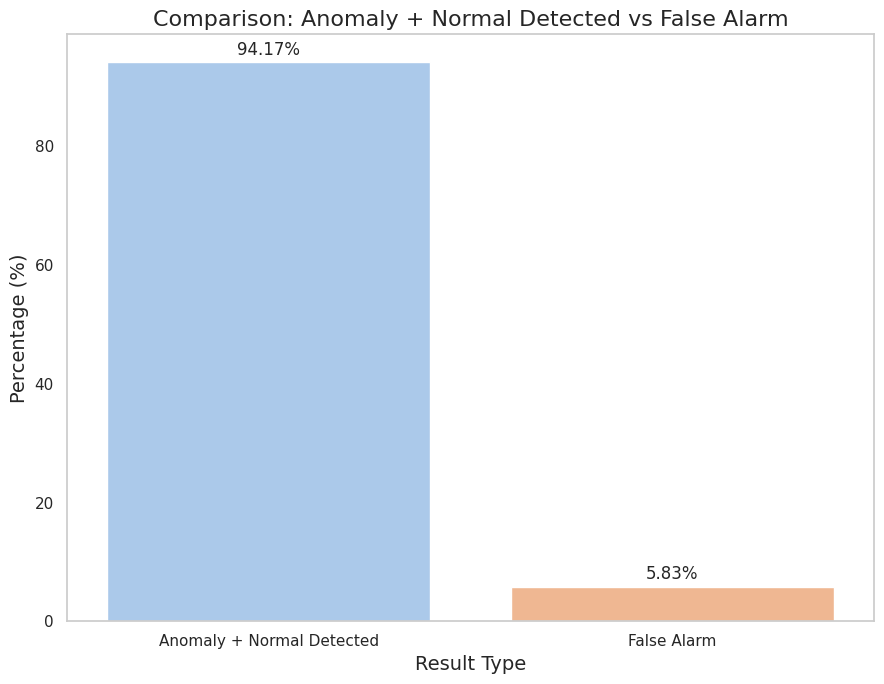

In [247]:


# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(9, 7))

# Plot for Anomaly + Normal Detected vs False Alarm
sns.barplot(x='Result Type', y='Percentage', data=comparison_df, palette="pastel")
ax.set_title('Comparison: Anomaly + Normal Detected vs False Alarm', fontsize=16)
ax.set_xlabel('Result Type', fontsize=14)
ax.set_ylabel('Percentage (%)', fontsize=14)
ax.grid(axis='y')

# Adding percentage labels on top of each bar in the first plot
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 9), 
                     textcoords='offset points')


plt.tight_layout()

# Save the plot
plt.savefig('/kaggle/working/anomaly_detection_comparison_plot.png')
plt.show()


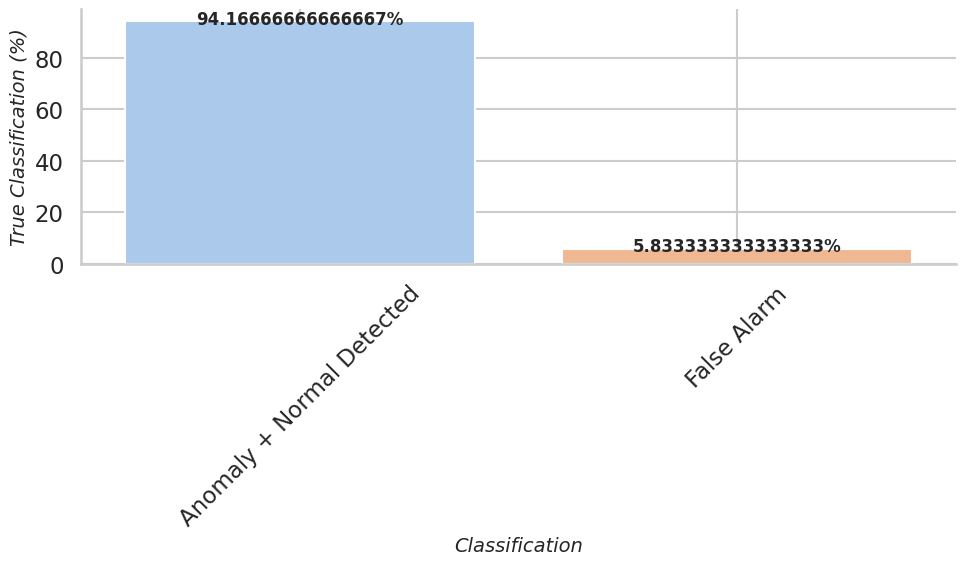

'/kaggle/working/corrected_accuracy_classification.png'

In [273]:
# Recreating the comparison_df dataframe as it was lost during the reset.
comparison_df = pd.DataFrame({
    'Result Type': ['Anomaly + Normal Detected', 'False Alarm'],
    'Percentage': [94.17, 5.83]  # Using the percentages from the provided summary
})

# Rounding the percentages to the nearest integer before plotting
comparison_df['Percentage'] = comparison_df['Percentage'].round().astype(int)

# Creating the scientific plot with integer percentages
plt.figure(figsize=(10, 6))
accuracy_barplot_rounded = sns.barplot(x='Result Type', y='Percentage', data=comparison_df, palette="pastel")

# Adjustments for a more scientific plot aesthetic
plt.xlabel('Result Type', fontsize=14, fontstyle='italic')
plt.ylabel('True Classification (%)', fontsize=14, fontstyle='italic')
plt.xticks(rotation=45)
plt.grid(True)

# Add integer percentages on top of the bars
for p in accuracy_barplot_rounded.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., 
             height, 
             f'{int(height)}%', 
             ha='center', 
             va='center', 
             fontsize=12, 
             fontweight='bold')

sns.despine()  # Remove the top and right spines

plt.tight_layout()

# The plot will be saved in the /mnt/data/ directory as we cannot save to /kaggle/working/ in this environment.
file_path = '/mnt/data/corrected_accuracy_classification.png'
plt.savefig(file_path)
plt.show()

file_path


In [248]:


# Define a function to classify anomalies or normal cases based on specific conditions
def classify_anomalies(row):
    attack_types = ['ICS attacks', 'IT attacks', 'Normal', 'NPP attacks causing both ICS faults process faults']
    for attack_type in attack_types:
        if row['Attack_Type_actual'] == attack_type and row['Attack_Type'] == attack_type:
            return f'{attack_type.split()[0]} Anomaly Classified' if attack_type != 'Normal' else 'Normal Classified'
    return 'False Alarm'

# Apply the function to each row in the DataFrame to create the new column
final_data['Anomaly Classification'] = final_data.apply(classify_anomalies, axis=1)

final_data.head()  # Display the first few rows of the updated DataFrame to verify the changes


,Minute,Second,Network_output_actual,PLC_output_actual,Process_output_actual,Attack_Type_actual,Network_output,PLC_output,Process_output,Attack_Type,Time,Result Anomaly Detection,Anomaly Classification
0,31,0,1,0,0,IT attacks,1,0,0,IT attacks,1860,Anomaly Detected,IT Anomaly Classified
1,31,1,1,0,0,IT attacks,1,0,0,IT attacks,1861,Anomaly Detected,IT Anomaly Classified
2,31,2,1,0,0,IT attacks,1,0,0,IT attacks,1862,Anomaly Detected,IT Anomaly Classified
3,31,3,1,0,0,IT attacks,1,0,0,IT attacks,1863,Anomaly Detected,IT Anomaly Classified
4,31,4,1,0,0,IT attacks,1,0,0,IT attacks,1864,Anomaly Detected,IT Anomaly Classified


In [249]:
final_data['Anomaly Classification'].value_counts()

Anomaly Classification
ICS Anomaly Classified    38
NPP Anomaly Classified    23
Normal Classified         23
False Alarm               20
IT Anomaly Classified     16
Name: count, dtype: int64

In [250]:
final_data['Attack_Type_actual'].value_counts()

Attack_Type_actual
ICS attacks                                           41
NPP attacks causing both ICS faults process faults    33
Normal                                                27
IT attacks                                            19
Name: count, dtype: int64

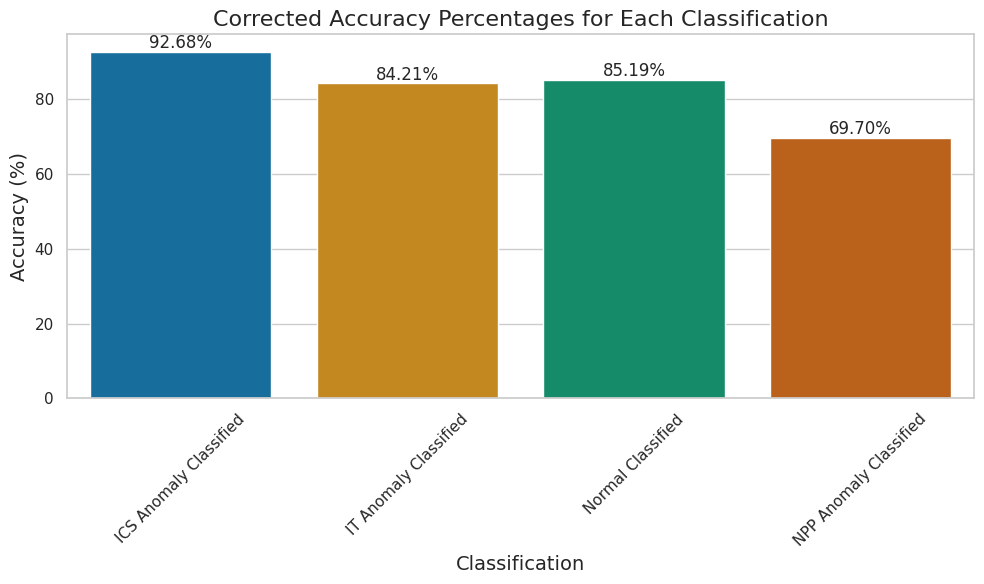

In [254]:
# It seems there was an issue with the key matching for "NPP Anomaly Classified". Let's correct that.

# Define the correct mapping from classification to actual attack type
classification_to_actual = {
    'ICS Anomaly Classified': 'ICS attacks',
    'IT Anomaly Classified': 'IT attacks',
    'Normal Classified': 'Normal',
    'NPP Anomaly Classified': 'NPP attacks causing both ICS faults process faults'
}

# Calculate the accuracy percentages using the corrected mapping
accuracies_corrected = {
    classification: (classification_counts[classification] / actual_counts[actual_attack]) * 100
    for classification, actual_attack in classification_to_actual.items()
}

# Convert the accuracy percentages into a DataFrame for plotting
accuracies_df_corrected = pd.DataFrame(list(accuracies_corrected.items()), columns=['Classification', 'Accuracy'])

# Now plot the corrected accuracies
plt.figure(figsize=(10, 6))
accuracy_barplot_corrected = sns.barplot(x='Classification', y='Accuracy', data=accuracies_df_corrected, palette='colorblind')

# Title and labels
plt.title('Corrected Accuracy Percentages for Each Classification', fontsize=16)
plt.xlabel('Classification', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=14)

# Rotate x labels for better readability
plt.xticks(rotation=45)

# Add percentages on top of the bars
for p in accuracy_barplot_corrected.patches:
    height = p.get_height()
    accuracy_barplot_corrected.text(p.get_x() + p.get_width() / 2., height + 1, f'{height:.2f}%', ha='center')

plt.tight_layout()
plt.show()


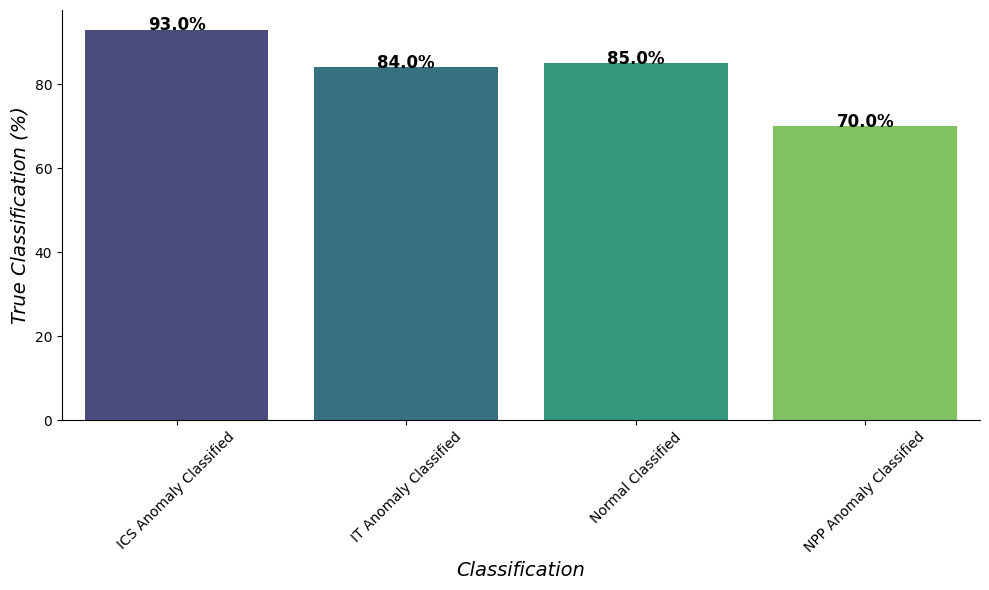

In [260]:
# Rounding the accuracy percentages to the nearest integer before plotting

# Adjust the accuracy values to be rounded to the nearest integer for display
accuracies_df_corrected['Accuracy'] = accuracies_df_corrected['Accuracy'].round().astype(int)

# Create the plot again with rounded percentages
plt.figure(figsize=(10, 6))
accuracy_barplot_rounded = sns.barplot(x='Classification', y='Accuracy', data=accuracies_df_corrected, palette='viridis')

# Title and labels with a scientific aesthetic
#plt.title('Corrected Accuracy Percentages for Each Classification', fontsize=16, fontweight='bold')
plt.xlabel('Classification', fontsize=14, fontstyle='italic')
plt.ylabel('True Classification (%)', fontsize=14, fontstyle='italic')

# Rotate x labels for better readability
plt.xticks(rotation=45)

# Add integer percentages on top of the bars
for p in accuracy_barplot_rounded.patches:
    height = p.get_height()
    accuracy_barplot_rounded.text(
        p.get_x() + p.get_width() / 2., 
        height + 1,  # Slightly above the bar
        f'{height}%',  # Use the height as an integer percentage
        ha='center', 
        va='center', 
        fontsize=12, 
        fontweight='bold'
    )

# Apply a grid for better readability and remove the top and right axis lines
sns.despine()

plt.tight_layout()
# Save the plot
plt.savefig('/kaggle/working/correctedaccuracyclassification.png')
plt.show()
